In [1]:
import re
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
#plt.style.use('seaborn')
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from datetime import datetime

In [2]:
 # Load data 
#mta = pd.read_csv('C:/Users/keith/Desktop/Thinkful/mta_1706.csv',encoding = "ISO-8859-1",error_bad_lines=False)
mta_bus = pd.read_csv('C:/Users/keith/Desktop/Thinkful/mta_1706_1.csv',encoding = "ISO-8859-1",error_bad_lines=False)
pd.set_option('display.max_columns', 50)

b'Skipping line 53192: expected 17 fields, saw 18\nSkipping line 56712: expected 17 fields, saw 18\nSkipping line 64874: expected 17 fields, saw 18\n'
b'Skipping line 80636: expected 17 fields, saw 18\nSkipping line 97072: expected 17 fields, saw 18\n'
b'Skipping line 107697: expected 17 fields, saw 18\nSkipping line 109317: expected 17 fields, saw 18\nSkipping line 119951: expected 17 fields, saw 18\n'
b'Skipping line 134667: expected 17 fields, saw 18\nSkipping line 139923: expected 17 fields, saw 18\nSkipping line 144309: expected 17 fields, saw 18\nSkipping line 157927: expected 17 fields, saw 18\nSkipping line 158907: expected 17 fields, saw 18\nSkipping line 161424: expected 17 fields, saw 18\n'
b'Skipping line 173221: expected 17 fields, saw 18\nSkipping line 173623: expected 17 fields, saw 18\nSkipping line 177253: expected 17 fields, saw 18\nSkipping line 181883: expected 17 fields, saw 18\nSkipping line 186684: expected 17 fields, saw 18\nSkipping line 191267: expected 17 fie

b'Skipping line 2831078: expected 17 fields, saw 18\nSkipping line 2831884: expected 17 fields, saw 18\nSkipping line 2832778: expected 17 fields, saw 18\n'
b'Skipping line 2935466: expected 17 fields, saw 18\nSkipping line 2937968: expected 17 fields, saw 18\n'
b'Skipping line 2952504: expected 17 fields, saw 18\n'
b'Skipping line 2982958: expected 17 fields, saw 18\nSkipping line 2991335: expected 17 fields, saw 18\nSkipping line 3006710: expected 17 fields, saw 18\nSkipping line 3013361: expected 17 fields, saw 18\n'
b'Skipping line 3019557: expected 17 fields, saw 18\nSkipping line 3032671: expected 17 fields, saw 18\n'
b'Skipping line 3068454: expected 17 fields, saw 18\nSkipping line 3079236: expected 17 fields, saw 18\n'
b'Skipping line 3081942: expected 17 fields, saw 18\nSkipping line 3095240: expected 17 fields, saw 18\n'
b'Skipping line 3166450: expected 17 fields, saw 18\nSkipping line 3178126: expected 17 fields, saw 18\n'
b'Skipping line 3192452: expected 17 fields, saw 1

b'Skipping line 5158386: expected 17 fields, saw 18\n'
b'Skipping line 5278636: expected 17 fields, saw 18\n'
b'Skipping line 5389023: expected 17 fields, saw 18\nSkipping line 5393062: expected 17 fields, saw 18\n'
b'Skipping line 5410409: expected 17 fields, saw 18\n'
b'Skipping line 5444054: expected 17 fields, saw 18\n'
b'Skipping line 5496628: expected 17 fields, saw 18\nSkipping line 5496629: expected 17 fields, saw 18\n'
b'Skipping line 5510776: expected 17 fields, saw 18\n'
b'Skipping line 5548626: expected 17 fields, saw 18\nSkipping line 5551773: expected 17 fields, saw 18\nSkipping line 5556312: expected 17 fields, saw 18\nSkipping line 5570453: expected 17 fields, saw 18\n'
b'Skipping line 5577387: expected 17 fields, saw 18\nSkipping line 5580723: expected 17 fields, saw 18\nSkipping line 5582075: expected 17 fields, saw 18\nSkipping line 5596334: expected 17 fields, saw 18\nSkipping line 5602325: expected 17 fields, saw 18\n'
b'Skipping line 5606005: expected 17 fields, s

In [3]:
#take sample because the full set is too much to try to analyze on local machine
mta = mta_bus.sample(n=20000,random_state=20)

# Data Description

In [4]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
249431,2017-06-02 00:05:00,1,Q17,138 ST/37 AV,40.761806,-73.829559,JAMAICA ARCHER AV,40.704933,-73.793320,NYCT_8442,40.712529,-73.784314,HILLSIDE AV/EDGERTON BL,approaching,128.0,NaN,23:58:34
5083624,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,0.9 miles away,1427.0,2017-06-23 16:26:00,16:26:16
2001707,2017-06-09 17:38:05,1,Bx9,NaN,NaN,NaN,WEST FARMS,40.840641,-73.879807,NYCT_1214,40.879992,-73.904038,BROADWAY/W 231 ST,approaching,120.0,2017-06-09 17:39:19,NaN
2315680,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,< 1 stop away,154.0,2017-06-11 15:11:24,14:59:05
2230060,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,approaching,104.0,2017-06-10 22:20:58,22:21:22


In [5]:
 mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 249431 to 5634610
Data columns (total 17 columns):
RecordedAtTime               20000 non-null object
DirectionRef                 20000 non-null int64
PublishedLineName            20000 non-null object
OriginName                   19821 non-null object
OriginLat                    19821 non-null float64
OriginLong                   19821 non-null float64
DestinationName              20000 non-null object
DestinationLat               19981 non-null float64
DestinationLong              19981 non-null float64
VehicleRef                   20000 non-null object
VehicleLocation.Latitude     20000 non-null float64
VehicleLocation.Longitude    20000 non-null float64
NextStopPointName            19973 non-null object
ArrivalProximityText         19973 non-null object
DistanceFromStop             19973 non-null float64
ExpectedArrivalTime          17362 non-null object
ScheduledArrivalTime         19505 non-null object
dtypes: flo

In [6]:
mta.shape

(20000, 17)

# Data cleaning

In [7]:
mta.duplicated().sum()

0

In [8]:
#pd.set_option('display.max_columns', None) # disables trucated columns 
#pd.set_option('display.max_rows', None) # disables trucated rows
mta.head()   

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
249431,2017-06-02 00:05:00,1,Q17,138 ST/37 AV,40.761806,-73.829559,JAMAICA ARCHER AV,40.704933,-73.793320,NYCT_8442,40.712529,-73.784314,HILLSIDE AV/EDGERTON BL,approaching,128.0,NaN,23:58:34
5083624,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,0.9 miles away,1427.0,2017-06-23 16:26:00,16:26:16
2001707,2017-06-09 17:38:05,1,Bx9,NaN,NaN,NaN,WEST FARMS,40.840641,-73.879807,NYCT_1214,40.879992,-73.904038,BROADWAY/W 231 ST,approaching,120.0,2017-06-09 17:39:19,NaN
2315680,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,< 1 stop away,154.0,2017-06-11 15:11:24,14:59:05
2230060,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,approaching,104.0,2017-06-10 22:20:58,22:21:22


In [9]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime'],
      dtype='object')

In [10]:
mta.columns=['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime']

In [11]:
mta.isnull().sum()

RecordedAtTime             0
DirectionRef               0
PublishedLineName          0
OriginName               179
OriginLat                179
OriginLong               179
DestinationName            0
DestinationLat            19
DestinationLong           19
VehicleRef                 0
VehicleLocation_Lat        0
VehicleLocation_Long       0
NextStopPointName         27
ArrivalProximityText      27
DistanceFromStop          27
ExpectedArrivalTime     2638
ScheduledArrivalTime     495
dtype: int64

In [12]:
(mta.isnull().sum()/mta.isnull().count()*100).astype(str)+" %"

RecordedAtTime            0.0 %
DirectionRef              0.0 %
PublishedLineName         0.0 %
OriginName              0.895 %
OriginLat               0.895 %
OriginLong              0.895 %
DestinationName           0.0 %
DestinationLat          0.095 %
DestinationLong         0.095 %
VehicleRef                0.0 %
VehicleLocation_Lat       0.0 %
VehicleLocation_Long      0.0 %
NextStopPointName       0.135 %
ArrivalProximityText    0.135 %
DistanceFromStop        0.135 %
ExpectedArrivalTime     13.19 %
ScheduledArrivalTime    2.475 %
dtype: object

We need to drop the rows with missing arrival times. It is usless to us if we can't find the bus is late or not.

In [13]:
mta = mta[mta.ExpectedArrivalTime.isnull()==False]  
mta.isnull().sum()
 

RecordedAtTime            0
DirectionRef              0
PublishedLineName         0
OriginName              151
OriginLat               151
OriginLong              151
DestinationName           0
DestinationLat           11
DestinationLong          11
VehicleRef                0
VehicleLocation_Lat       0
VehicleLocation_Long      0
NextStopPointName         0
ArrivalProximityText      0
DistanceFromStop          0
ExpectedArrivalTime       0
ScheduledArrivalTime    151
dtype: int64

In [14]:
mta = mta[mta.ScheduledArrivalTime.isnull()==False]
mta.isnull().sum()

RecordedAtTime          0
DirectionRef            0
PublishedLineName       0
OriginName              0
OriginLat               0
OriginLong              0
DestinationName         0
DestinationLat          0
DestinationLong         0
VehicleRef              0
VehicleLocation_Lat     0
VehicleLocation_Long    0
NextStopPointName       0
ArrivalProximityText    0
DistanceFromStop        0
ExpectedArrivalTime     0
ScheduledArrivalTime    0
dtype: int64

In [15]:
len(mta)/200000

0.086055

In [16]:
# reindex dataset
mta.index = range(len(mta.index))

That took care of all of our null values, that we can tell anyway.

Next we need to create a target variable. We are trying to predict if a bus is going to be late or not so we will convert the time rows in to manageable data and the find the difference in times.

In [17]:
# modifying "ScheduledArrivalTime" format to match "EstimatedArrivalTime"
mta.loc[list(np.where(mta.ScheduledArrivalTime=='24:00:00')[0]),'ScheduledArrivalTime'] = '00:00:01'
mta['ScheduledArrivalTime'] = pd.to_timedelta(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_timedelta(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)

# converting "ExpectedArrivalTime" to datetime format and them finding the diffence between ScheduledArrivalTime
# "ExpectedArrivalTime"
mta['ExpectedArrivalTime'] = pd.to_datetime(mta.ExpectedArrivalTime)
mta['ScheduledArrivalTime'] = mta.ExpectedArrivalTime.dt.date.astype('str') +' '+ mta.ScheduledArrivalTime.dt.time.astype('str')
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)
index = mta[(mta.ScheduledArrivalTime.dt.hour==23) & (mta.ExpectedArrivalTime.dt.hour==00)].index
mta.loc[index,'ScheduledArrivalTime'] = mta.ScheduledArrivalTime + pd.DateOffset(days=-1)

# Finally creating a binary target "Late_bus"
mta.loc[list(np.where(mta.ExpectedArrivalTime>mta.ScheduledArrivalTime)[0]),'Time_delay'] = pd.to_datetime(mta.ExpectedArrivalTime -  mta.ScheduledArrivalTime).dt.minute 
mta.loc[list(np.where(mta.ExpectedArrivalTime<mta.ScheduledArrivalTime)[0]),'Time_delay'] = pd.to_datetime(mta.ScheduledArrivalTime - mta.ExpectedArrivalTime ).dt.minute*-1
mta.loc[list(np.where(mta.Time_delay.isna()==True)[0]),'Time_delay'] = 0

mta['Late_Bus'] = np.where(mta.Time_delay>7, 1, 0)

In [18]:
# checking to make sure that time is only in the month of June
mta.ScheduledArrivalTime.dt.month.unique()

array([6], dtype=int64)

In [19]:
mta.drop(list(np.where(mta.ScheduledArrivalTime.dt.month==5)[0]),axis='index',inplace=True)
# reindex dataset
mta.index = range(len(mta.index))
mta.ScheduledArrivalTime.dt.month.unique()

array([6], dtype=int64)

In [20]:
# test to see if it worked from a sample
mta.sample(frac=.001).head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus
5995,2017-06-09 06:47:10,1,Q5,FRANCIS LEWIS BL/SUNRISE HY,40.666046,-73.735962,LTD JAMAICA PARSONS ARCHER via MERRICK,40.701683,-73.802475,NYCT_8442,40.677023,-73.742962,MERRICK BL/226 ST,approaching,121.0,2017-06-09 06:47:45,2017-06-09 06:45:20,2.0,0
4562,2017-06-13 14:34:51,0,Q76,165 ST TERM/165 ST TERM BAY 3,40.708107,-73.795555,COLLEGE PT 20 AV via F LEWIS,40.782139,-73.836708,NYCT_4210,40.758535,-73.783823,FRANCIS LEWIS BL/42 AV,approaching,144.0,2017-06-13 14:35:51,2017-06-13 14:32:57,2.0,0
12745,2017-06-01 11:43:39,1,B44,LEE AV/FLUSHING AV,40.699505,-73.953484,SHEPSHD BAY KNAPP ST via NOSTRND,40.585064,-73.931343,NYCT_7352,40.603693,-73.942509,NOSTRAND AV/AV T,approaching,152.0,2017-06-01 11:44:35,2017-06-01 11:45:12,0.0,0
10700,2017-06-22 16:58:27,1,X2,E 57 ST/3 AV,40.760429,-73.967674,NEW DORP via HYLAN BL,40.564228,-74.110336,NYCT_2612,40.566757,-74.113608,EBBITTS ST/HYLAN BL,approaching,116.0,2017-06-22 16:59:01,2017-06-22 16:28:58,30.0,1
7438,2017-06-18 19:52:48,1,B8,ROCKAWAY AV/HEGEMAN AV,40.655903,-73.907318,BAY RIDGE 95 ST STA,40.616261,-74.031128,NYCT_417,40.640945,-73.948496,NOSTRAND AV/NEWKIRK AV,approaching,97.0,2017-06-18 19:53:38,2017-06-18 19:53:00,0.0,0


The conversion worked. We created a feature 'Time_delay' where the values are the minutes of delay ot the bus. Values that are greater than zero are the number of minutes past the scheduled arrival time. The values that are less that zero are the number of minutes the bus arrived ahead of schedule.

The 'Late_Bus' feature is labels a '1' for a bus who's arrival time is greater than 15 min past the scheduled arrival time and labels a '0' for anything under that time. This is our target

In [21]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus
0,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,0.9 miles away,1427.0,2017-06-23 16:26:00,2017-06-23 16:26:16,0.0,0
1,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,< 1 stop away,154.0,2017-06-11 15:11:24,2017-06-11 14:59:05,12.0,1
2,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,approaching,104.0,2017-06-10 22:20:58,2017-06-10 22:21:22,0.0,0
3,2017-06-14 10:06:11,1,B62,JACKSON AV/QUEENS PZ S,40.748638,-73.938446,DOWNTOWN BKLYN FULTON MALL,40.690407,-73.989471,NYCT_4519,40.712838,-73.960482,DRIGGS AV/S 2 ST,approaching,49.0,2017-06-14 10:06:27,2017-06-14 09:59:15,7.0,0
4,2017-06-28 17:09:54,1,Q76,132 ST/20 AV,40.782063,-73.836716,JAMAICA 165 ST TERM via F LEWIS,40.707615,-73.795540,NYCT_4195,40.715189,-73.773367,HILLSIDE AV/188 ST,at stop,8.0,2017-06-28 17:10:08,2017-06-28 17:03:28,6.0,0


In [22]:
mta.Late_Bus.value_counts()

0    12626
1     4585
Name: Late_Bus, dtype: int64

    Next, "ArrivalProximityText" and "DistanceFromStop" are redundant variables so one can be dropped.

In [23]:
mta.drop("ArrivalProximityText",1,inplace=True)

In [24]:
# convert the categorical variables to the correct data type
columns = ['DirectionRef','PublishedLineName','OriginName',
           'DestinationName','VehicleRef','NextStopPointName']
for col in columns:
    mta[col] = mta[col].astype('category')
    
mta['RecordedAtTime'] = pd.to_datetime(mta.RecordedAtTime)

In [25]:
# breaking up "ScheduledArrivalTime" into components
mta['day'] = pd.to_numeric(mta.ScheduledArrivalTime.dt.day)
mta['hour'] = pd.to_numeric(mta.ScheduledArrivalTime.dt.hour)
mta['minute'] = pd.to_numeric(mta.ScheduledArrivalTime.dt.minute)
mta['weekday'] = mta.ScheduledArrivalTime.dt.day_name().astype('category')
mta['day_of_week'] = pd.to_numeric(mta.ScheduledArrivalTime.dt.weekday)

In [26]:
# sort dataframe by Scheduled arrival time
mta.index = mta.ScheduledArrivalTime
mta = mta.sort_index()
mta.index = range(len(mta))

In [27]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,day,hour,minute,weekday,day_of_week
0,2017-06-01 00:03:30,1,X17,E 57 ST/3 AV,40.760429,-73.967674,ARDEN HTS HUGENOT AV via NJ via DRMGOOLE,40.543644,-74.196716,NYCT_2725,40.563053,-74.175912,ARTHUR KILL RD/ANNADALE RD,157.0,2017-06-01 00:03:56,2017-06-01 00:01:32,2.0,0,1,0,1,Thursday,3
1,2017-06-01 00:13:31,0,Q30,ARCHER AV /SUTPHIN BL,40.700489,-73.807884,LITTLE NECK L NECK PKY,40.764297,-73.725914,NYCT_8443,40.764774,-73.725227,NASSAU BL/LITTLE NECK PY,77.0,2017-06-01 00:13:57,2017-06-01 00:02:00,11.0,1,1,0,2,Thursday,3
2,2017-06-01 00:03:40,1,Bx36,RANDALL AV/OLMSTEAD AV,40.818676,-73.851555,WASHINGTON HTS GW BRIDGE,40.849033,-73.937309,NYCT_281,40.822321,-73.855112,LAFAYETTE AV/PUGSLEY AV,29.0,2017-06-01 00:03:56,2017-06-01 00:02:51,1.0,0,1,0,2,Thursday,3
3,2017-06-01 00:13:47,0,Q17,MERRICK BL/ARCHER AV,40.704906,-73.793304,FLUSHING MAIN ST STA,40.761745,-73.829529,NYCT_8417,40.740906,-73.787620,HORACE HARDING EXP/185 ST,162.0,2017-06-01 00:14:07,2017-06-01 00:09:53,4.0,0,1,0,9,Thursday,3
4,2017-06-01 00:13:38,0,B38,TILLARY ST/CADMAN PZ E,40.696106,-73.990364,RIDGEWOOD METRO AV,40.713341,-73.914688,NYCT_7228,40.687247,-73.976757,FULTON ST/LAFAYETTE AV,10.0,2017-06-01 00:13:57,2017-06-01 00:14:50,0.0,0,1,0,14,Thursday,3


# Exploratory Data Analysis

In [28]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime', 'Time_delay', 'Late_Bus',
       'day', 'hour', 'minute', 'weekday', 'day_of_week'],
      dtype='object')

In [29]:
mta.describe()

,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation_Lat,VehicleLocation_Long,DistanceFromStop,Time_delay,Late_Bus,day,hour,minute,day_of_week
count,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000,17211.000000
mean,40.729311,-73.931038,40.728702,-73.931645,40.728349,-73.930789,250.279879,5.404451,0.266399,15.470455,13.059264,29.588461,2.763175
std,0.090347,0.093042,0.090573,0.094092,0.086764,0.087809,1079.042462,9.105150,0.442088,8.711509,5.377096,17.308531,1.812326
min,40.506882,-74.246948,40.508106,-74.246948,40.503655,-74.251687,0.000000,-50.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.657738,-73.987122,40.657658,-73.989471,40.657721,-73.978969,33.500000,0.000000,0.000000,8.000000,9.000000,15.000000,1.000000
50%,40.715233,-73.932449,40.713356,-73.932266,40.723288,-73.936253,104.000000,3.000000,0.000000,15.000000,13.000000,30.000000,3.000000
75%,40.809174,-73.879936,40.807545,-73.879517,40.803432,-73.883165,214.000000,8.000000,1.000000,23.000000,17.000000,45.000000,4.000000
max,40.912365,-73.701866,40.912376,-73.701385,40.912031,-73.701559,29887.000000,59.000000,1.000000,30.000000,23.000000,59.000000,6.000000


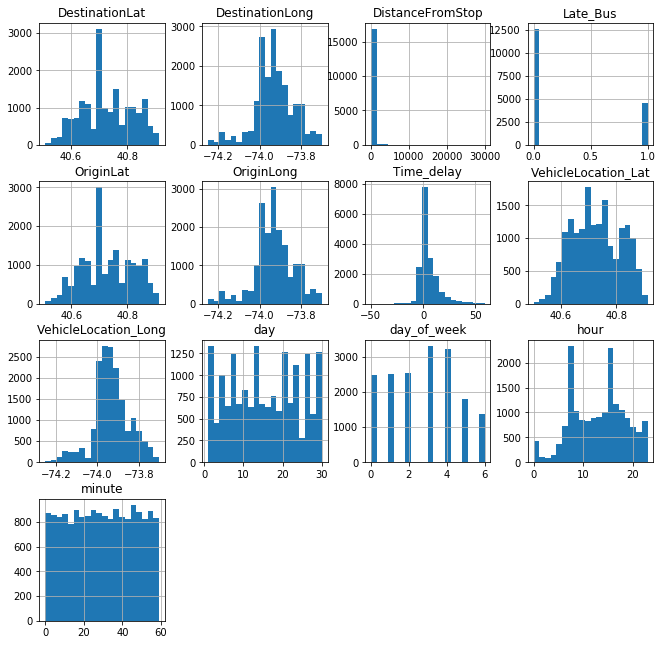

In [30]:
mta.hist(figsize=(11,11),bins=20)
plt.show()

From the histograms of our continuous features we can see that we have a very unbalanced target, which would be expected. There should definetly be more on-time busses that late ones. From here I want to look at the continuous variables for against the target.
 

In [31]:
# Test of the mean distance between stops of late and on-time busses
Late_Bus_dist = mta[mta.Late_Bus==1] 
On_Time_Bus_dist = mta[mta.Late_Bus==0] 
print(stats.ttest_ind(Late_Bus_dist.DistanceFromStop,On_Time_Bus_dist.DistanceFromStop),'\n')

# calculate correlation distance from stop and late busses
print('Correlation of distance from stops and late busses \n',mta.DistanceFromStop.corr(mta.Late_Bus))
print()
print(stats.ttest_ind(Late_Bus_dist.Time_delay,On_Time_Bus_dist.Time_delay),'\n')

 

Ttest_indResult(statistic=2.825369133375402, pvalue=0.0047280538189934255) 

Correlation of distance from stops and late busses 
 0.021532610004554243

Ttest_indResult(statistic=156.51492682118848, pvalue=0.0) 



There is a statistically significant difference in the average distance from stop of Late busses and on-time busses. There is also a positive correlation between distance from stop and late busses.

In [32]:
mta[['Time_delay','DistanceFromStop']].describe()

,Time_delay,DistanceFromStop
count,17211.000000,17211.000000
mean,5.404451,250.279879
std,9.105150,1079.042462
min,-50.000000,0.000000
25%,0.000000,33.500000
50%,3.000000,104.000000
75%,8.000000,214.000000
max,59.000000,29887.000000


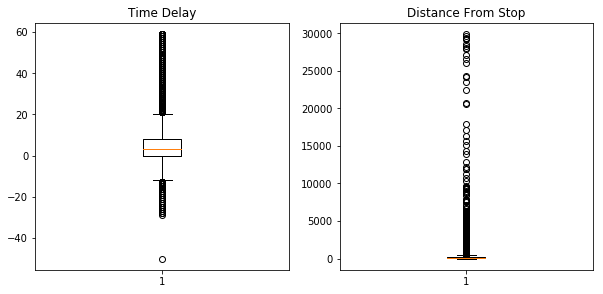

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.boxplot(mta.Time_delay)
plt.title('Time Delay')
plt.subplot(222)
plt.title('Distance From Stop')
plt.boxplot(mta.DistanceFromStop) 
plt.show()

Nothing will be done to correct the outliers in the Time Delay variable. We used this to create out target variable and it will not be used in any models. As far a the distance from stop variable we can look at winzorizing to minimize the outliers.

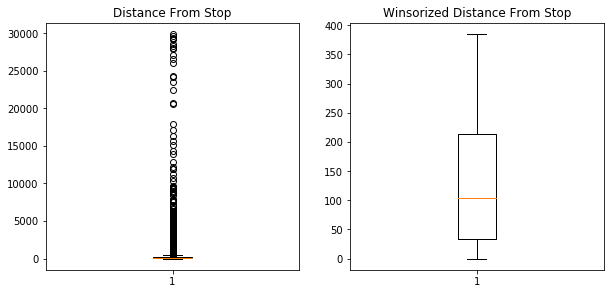

In [34]:
winsor_dist = winsorize(mta["DistanceFromStop"], (0, .1)) # one way wizorization of distance from stop 
#                                                           variable with limit set at the 90th percentile

plt.figure(figsize=(10,10))
plt.title('Distance From Stop') 
plt.subplot(221)
plt.title('Distance From Stop')
plt.boxplot(mta.DistanceFromStop) 


plt.subplot(222)
plt.title('Winsorized Distance From Stop')
plt.boxplot(winsor_dist)
plt.show()

In [35]:
# create a feature for winsorization of the distance from stops
mta['winsor_dist'] = winsor_dist 

In [36]:
mta.sample(frac=.1)[:10]

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,day,hour,minute,weekday,day_of_week,winsor_dist
281,2017-06-01 11:54:46,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,LTD MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4712,40.823783,-73.924472,GRAND CONCOURSE/E 149 ST,617.0,2017-06-01 11:57:16,2017-06-01 11:46:00,11.0,1,1,11,46,Thursday,3,385.0
2116,2017-06-04 21:20:00,0,B38,TILLARY ST/CADMAN PZ E,40.696106,-73.990364,RIDGEWOOD METRO AV,40.713341,-73.914688,NYCT_7251,40.689407,-73.955438,LAFAYETTE AV/BEDFORD AV,63.0,2017-06-04 21:20:24,2017-06-04 21:16:25,3.0,0,4,21,16,Sunday,6,63.0
6804,2017-06-12 22:43:15,0,B31,GERRITSEN AV/GERRITSEN BEACH,40.587101,-73.918503,MIDWOOD KINGS HWY STA,40.608433,-73.957100,NYCT_4581,40.608388,-73.957033,QUENTIN RD/E 16 ST,4.0,2017-06-12 22:43:49,2017-06-12 22:41:00,2.0,0,12,22,41,Monday,0,4.0
15635,2017-06-28 12:39:41,1,Q17,138 ST/37 AV,40.761806,-73.829559,JAMAICA ARCHER AV,40.704933,-73.793320,NYCT_8066,40.705260,-73.793502,MERRICK BL/ARCHER AV,39.0,2017-06-28 12:39:56,2017-06-28 12:47:00,-7.0,0,28,12,47,Wednesday,2,39.0
10400,2017-06-19 09:44:01,1,Bx28,EARHART LA/ERSKINE PL,40.861115,-73.822548,FORDHM CTR 192 ST via GUNHILL,40.864204,-73.894531,NYCT_4417,40.864490,-73.894202,VALENTINE AV/E 192 ST,41.0,2017-06-19 09:44:48,2017-06-19 09:40:00,4.0,0,19,9,40,Monday,0,41.0
12359,2017-06-22 12:39:08,0,M15,SOUTH ST/WHITEHALL ST,40.701538,-74.012482,EAST HARLEM 125 ST via 1 AV,40.803150,-73.932266,NYCT_5263,40.781652,-73.945885,1 AV/ E 97 ST,390.0,2017-06-22 12:41:49,2017-06-22 12:30:34,11.0,1,22,12,30,Thursday,3,385.0
16166,2017-06-29 11:21:20,0,Q12,ROOSEVELT AV/LAYOVER,40.758999,-73.831757,LITTLE NECK GLENWOOD ST VIA NORTHERN,40.771767,-73.733307,NYCT_7398,40.760836,-73.807029,SANFORD AV/160 ST,138.0,2017-06-29 11:21:50,2017-06-29 11:21:05,0.0,0,29,11,21,Thursday,3,138.0
1548,2017-06-03 14:08:10,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4813,40.675255,-73.896731,JAMAICA AV/FANCHON PL,452.0,2017-06-03 14:11:10,2017-06-03 13:55:31,15.0,1,3,13,55,Saturday,5,385.0
549,2017-06-01 19:05:13,0,M7,AV OF THE AMERICAS/W 14 ST,40.737930,-73.996346,HARLEM 147 ST via 6 AV via AMSTERDAM,40.821110,-73.935898,NYCT_3881,40.747436,-73.989500,AV OF THE AMERICAS/W 31 ST,77.0,2017-06-01 19:05:58,2017-06-01 18:37:46,28.0,1,1,18,37,Thursday,3,77.0
10496,2017-06-19 13:34:27,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5348,40.709475,-73.960336,WASHINGTON PLZ/WASHINGTON PLZ,67.0,2017-06-19 13:34:45,2017-06-19 13:23:00,11.0,1,19,13,23,Monday,0,67.0


# Categorical Variables

In [37]:
mta[['PublishedLineName', 'OriginName','DestinationName','VehicleRef','NextStopPointName']].describe()

,PublishedLineName,OriginName,DestinationName,VehicleRef,NextStopPointName
count,17211,17211,17211,17211,17211
unique,236,475,561,4172,5873
top,B6,E 126 ST/2 AV,WASHINGTON HTS GW BRIDGE,NYCT_4242,138 ST/37 AV
freq,325,295,225,14,38


# Late Busses and Time Delays by hour


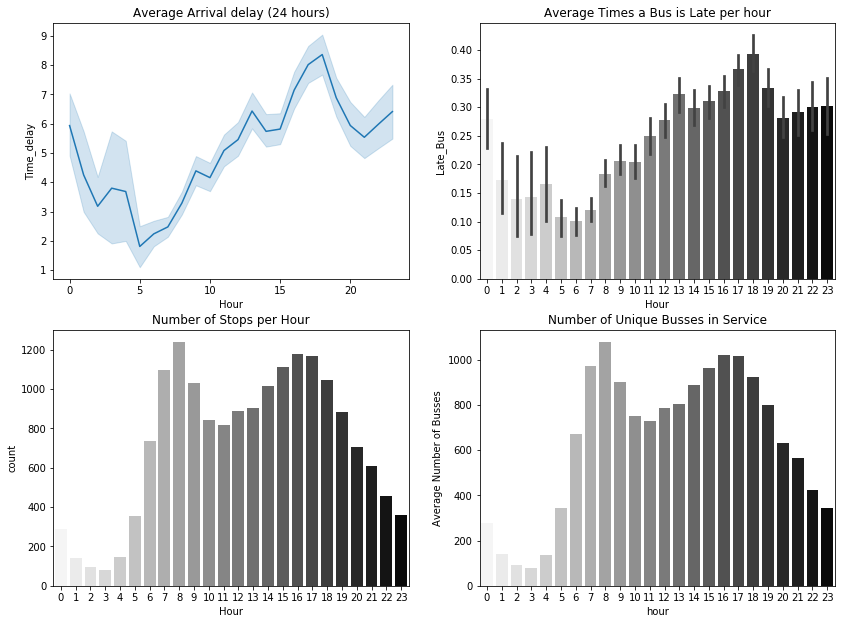

In [38]:
plt.figure(figsize=(14,16))
plt.subplot(321)
sns.lineplot(x= mta.ScheduledArrivalTime.dt.hour, 
             y=mta.Time_delay, data=mta,)
plt.title('Average Arrival delay (24 hours)') 
plt.xlabel('Hour')

plt.subplot(322)
sns.barplot(mta.ScheduledArrivalTime.dt.hour,mta[mta.DistanceFromStop<500].Late_Bus,palette= "gist_gray_r")
plt.title('Average Times a Bus is Late per hour')
plt.xlabel('Hour')

plt.subplot(323)
sns.countplot(mta.ScheduledArrivalTime.dt.hour, palette= "gist_gray_r")
plt.title('Number of Stops per Hour') 
plt.xlabel('Hour')

plt.subplot(324)
hour_df = pd.DataFrame(mta.groupby('hour').VehicleRef.unique())
hour_df = pd.DataFrame(hour_df.VehicleRef.apply(lambda x : len(x)))
plt.title('Number of Unique Busses in Service')
plt.xlabel('Hour')
plt.ylabel('Busses in Service')
hour_df['hour'] = hour_df.index
hour_df.index = range(len(hour_df))
sns.barplot(hour_df.hour, hour_df.VehicleRef, palette= "gist_gray_r")
plt.ylabel('Average Number of Busses')

plt.show()

After 6a.m. then average number of late busses steadily increases and peaks at 6p.m. It then flattens and falls between the hours of 1a.m. and 6a.m. This could be because there is less traffic at this time. 

In [39]:
index = mta[(mta.ScheduledArrivalTime.dt.hour>=8) & (mta.ScheduledArrivalTime.dt.hour<=19)].index  
mta['increased_Late'] = 0
mta.loc[index,'increased_Late'] = 1


In [40]:
mta.increased_Late.value_counts()

1    12135
0     5076
Name: increased_Late, dtype: int64

Here I am going to bin hours in to groups to form a feature that represents afternoon evening and night to caprture the differences in late busses during those times. 

In [41]:
# create time of day feature
bins=[-1, 5, 11, 16, 20, 23]
bin_names = ['night','morning','afternoon','evening','Night']
mta['time_of_day'] = pd.cut(mta.ScheduledArrivalTime.dt.hour, bins,labels=bin_names)
mta['time_of_day'] = mta['time_of_day'].str.lower().astype('category')

In [42]:
(mta.groupby(mta.time_of_day).Late_Bus.mean().sort_index(ascending=False)*100).astype(str)+" %"

time_of_day
night        24.290220820189273 %
morning      17.845993756503642 %
evening       35.59055118110236 %
afternoon    31.064914689154737 %
Name: Late_Bus, dtype: object

Afternoon and evening look to have the greatest average of late busses. Before looking I would have expected morning and evening to have the worse of the problem because of traffic at those times. Lets do a ttest to confirm that there is significant differences in the average number of late busses between each time of day.

In [43]:
# t-test between the means of the percentage of late busses of the hours in the day
tod_pvalues = {}
for i in range(len(mta.time_of_day.unique())):
        for j in range(i+1,4):
            print(mta.time_of_day.unique()[i],' vs ',mta.time_of_day
                  .unique()[j]) 
            print(stats.ttest_ind(
                mta[mta.time_of_day==mta.time_of_day.unique()[i]]['Late_Bus'], 
                mta[mta.time_of_day==mta.time_of_day.unique()[j]]['Late_Bus']))           

night  vs  morning
Ttest_indResult(statistic=6.803103548810826, pvalue=1.0948794726131699e-11)
night  vs  afternoon
Ttest_indResult(statistic=-6.170549277951211, pvalue=7.152707063972357e-10)
night  vs  evening
Ttest_indResult(statistic=-9.595013598429581, pvalue=1.1764578652167088e-21)
morning  vs  afternoon
Ttest_indResult(statistic=-16.28312700048901, pvalue=6.467532871917423e-59)
morning  vs  evening
Ttest_indResult(statistic=-20.059144207177372, pvalue=1.0477722609772258e-87)
afternoon  vs  evening
Ttest_indResult(statistic=-4.499029521053928, pvalue=6.912975958539333e-06)


 There looks to be significant diffences between each time of day.

### What percentage of busses are late per hour?


Here is a numerical representation of the graphs above.

In [44]:
(mta.groupby(mta.ScheduledArrivalTime.dt.hour).Late_Bus.mean().sort_index(ascending=False)*100).astype(str)+" %"

ScheduledArrivalTime
23     30.47091412742382 %
22     30.28322440087146 %
21    28.852459016393446 %
20     28.42998585572843 %
19     33.40857787810384 %
18     39.77055449330784 %
17     37.83091374893254 %
16    33.050127442650805 %
15    31.413141314131416 %
14     30.25540275049116 %
13     32.22958057395143 %
12     27.73393461104848 %
11     25.03052503052503 %
10     20.59171597633136 %
9     20.679611650485437 %
8     18.321226795803067 %
7     12.647861692447679 %
6      9.673024523160763 %
5     10.393258426966293 %
4      16.43835616438356 %
3                   15.0 %
2     13.829787234042554 %
1     16.901408450704224 %
0                 28.125 %
Name: Late_Bus, dtype: object

# Late Busses and Time Delays by day of the Week

In [45]:
print('Description of Late Busses Delays by Weekday')
weekday_order={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
Late_bus_mean = mta[mta.Time_delay>=0].groupby(mta.ScheduledArrivalTime.dt.weekday).Late_Bus.describe()
Late_bus_mean.index = weekday_order.values()
Late_bus_mean

Description of Late Busses Delays by Weekday


,count,mean,std,min,25%,50%,75%,max
Monday,1983.0,0.254665,0.435782,0.0,0.0,0.0,1.0,1.0
Tuesday,2110.0,0.306161,0.461007,0.0,0.0,0.0,1.0,1.0
Wednesday,2200.0,0.333182,0.471458,0.0,0.0,0.0,1.0,1.0
Thursday,2727.0,0.309498,0.462371,0.0,0.0,0.0,1.0,1.0
Friday,2727.0,0.322332,0.467455,0.0,0.0,0.0,1.0,1.0
Saturday,1539.0,0.365172,0.481635,0.0,0.0,0.0,1.0,1.0
Sunday,1189.0,0.349874,0.477131,0.0,0.0,0.0,1.0,1.0


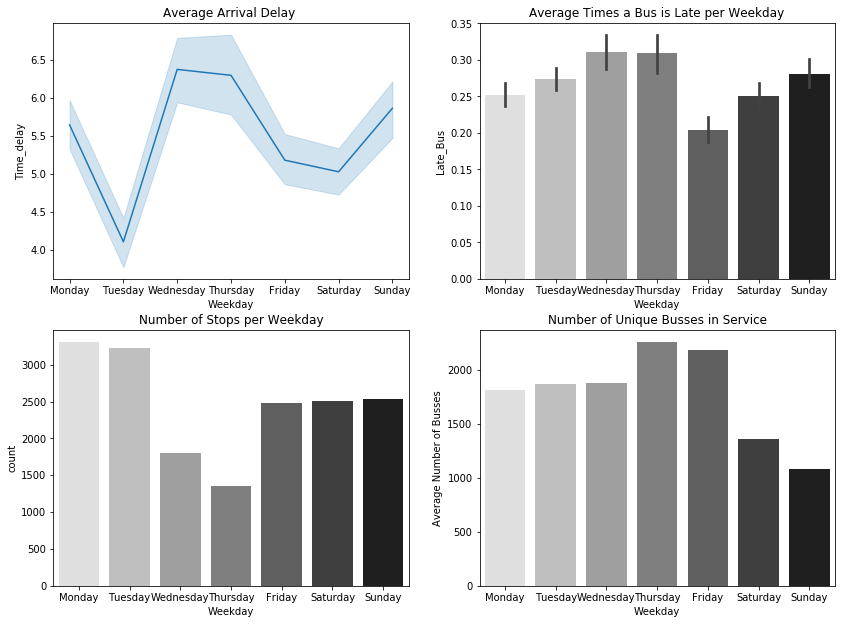

In [46]:
plt.figure(figsize=(14,16))
plt.subplot(321)
sns.lineplot(x= mta.ScheduledArrivalTime.dt.day_name(), 
             y=mta.Time_delay, data=mta)
plt.xticks(range(0,7), weekday_order.values())
plt.title('Average Arrival Delay ') 
plt.xlabel('Weekday')

plt.subplot(322)
sns.barplot(mta.ScheduledArrivalTime.dt.day_name(),mta[mta.DistanceFromStop<500].Late_Bus, palette= "gist_gray_r")
plt.title('Average Times a Bus is Late per Weekday')
plt.xticks(range(0,7), weekday_order.values())
plt.xlabel('Weekday')

plt.subplot(323)
sns.countplot(mta.ScheduledArrivalTime.dt.day_name(), palette= "gist_gray_r")
plt.xticks(range(0,7), weekday_order.values())
plt.title('Number of Stops per Weekday') 
plt.xlabel('Weekday')

plt.subplot(324)
day_df = pd.DataFrame(mta.groupby('day_of_week').VehicleRef.unique())
day_df = pd.DataFrame(day_df.VehicleRef.apply(lambda x : len(x)))
plt.title('Number of Unique Busses in Service')
plt.xlabel('Weekday')
plt.ylabel('Busses in Service')
day_df['Weekday'] = day_df.index
day_df.index = range(len(day_df))
sns.barplot(day_df.Weekday, day_df.VehicleRef,palette= "gist_gray_r")
plt.ylabel('Average Number of Busses')
plt.xticks(range(0,7),weekday_order.values())
plt.show()

In [47]:
#ttest between the means of the percentage of late busses of the days of the week
pvales = {}
for i in range(len(mta.ScheduledArrivalTime.dt.weekday.unique())):
        for j in range(i+1,7):
            print(mta.ScheduledArrivalTime.dt.day_name().unique()[i],' vs ',mta.ScheduledArrivalTime.dt.day_name().unique()[j]) 
            print(stats.ttest_ind(
                mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[i]]['Late_Bus'], 
                mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[j]]['Late_Bus']))
            pvales.update({(mta.ScheduledArrivalTime.dt.day_name().unique()[i],' vs ',mta.ScheduledArrivalTime.dt.day_name().unique()[j]):
                          stats.ttest_ind(
                          mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[i]]['Late_Bus'], 
                          mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[j]]['Late_Bus'])[1]})

Thursday  vs  Friday
Ttest_indResult(statistic=-1.5602802616953448, pvalue=0.11874211047485317)
Thursday  vs  Saturday
Ttest_indResult(statistic=-4.34573659403194, pvalue=1.4150495286645776e-05)
Thursday  vs  Sunday
Ttest_indResult(statistic=-3.5849661412079454, pvalue=0.00034057390278027897)
Thursday  vs  Monday
Ttest_indResult(statistic=4.58260631092361, pvalue=4.688713274566886e-06)
Thursday  vs  Tuesday
Ttest_indResult(statistic=-0.23281802401703489, pvalue=0.8159109201283206)
Thursday  vs  Wednesday
Ttest_indResult(statistic=-2.8626366536620043, pvalue=0.004216267341610929)
Friday  vs  Saturday
Ttest_indResult(statistic=-2.990733878460198, pvalue=0.0027965755462951015)
Friday  vs  Sunday
Ttest_indResult(statistic=-2.3527135001653203, pvalue=0.018679036289286254)
Friday  vs  Monday
Ttest_indResult(statistic=5.994132688719072, pvalue=2.1710678149255516e-09)
Friday  vs  Tuesday
Ttest_indResult(statistic=1.2166530369272877, pvalue=0.2237863656243663)
Friday  vs  Wednesday
Ttest_indRes

In [48]:
# find all comparisons with pvalues > .05
non_significant = [i for i in pvales if pvales.get(i)>.05]
non_significant

[('Thursday', ' vs ', 'Friday'),
 ('Thursday', ' vs ', 'Tuesday'),
 ('Friday', ' vs ', 'Tuesday'),
 ('Friday', ' vs ', 'Wednesday'),
 ('Saturday', ' vs ', 'Sunday'),
 ('Saturday', ' vs ', 'Wednesday'),
 ('Sunday', ' vs ', 'Wednesday')]

There is no statistcal significance in the average number of late busses between the above days of the week.
Wednesday and Thursday have the greatest average number of late busses. I will make and indicator feature to mark these days. 

In [49]:
# mark Wed and Thurs. as peak late busses
mta['is_midweek'] = 0
mta.loc[list(np.where(mta[(mta.ScheduledArrivalTime.dt.weekday==2)|(mta.ScheduledArrivalTime.dt.weekday==3)])[0]),'is_midweek'] = 1

In [50]:
mta.is_midweek.value_counts()

0    11367
1     5844
Name: is_midweek, dtype: int64

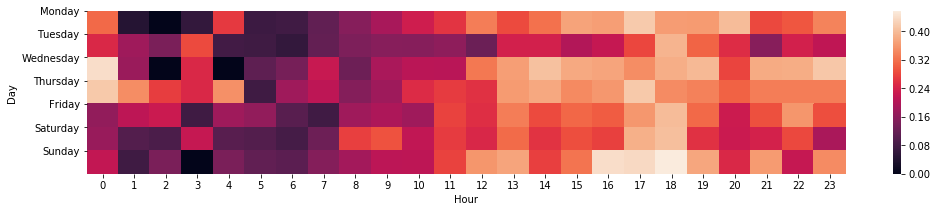

In [51]:
plt.figure(figsize=(17,3))
heat_weekdayhour = mta.pivot_table(index=mta.ScheduledArrivalTime.dt.day_name(), columns=mta.ScheduledArrivalTime.dt.hour, values="Late_Bus")
sns.heatmap(heat_weekdayhour,)
plt.xlabel('Hour')
plt.ylabel('Day')
plt.yticks(np.arange(7),weekday_order.values())
plt.show() 

The heatmap above shows the average late busses of the days of week by hour. There doesnt seem to be any significant difference between the hours that we normally associate with rush hour. it seems that there is just a steady increase of late busses from about 9:30 am up to midnight and then a lull between those times. 

# Late Busses and Time Delays by day of the Month

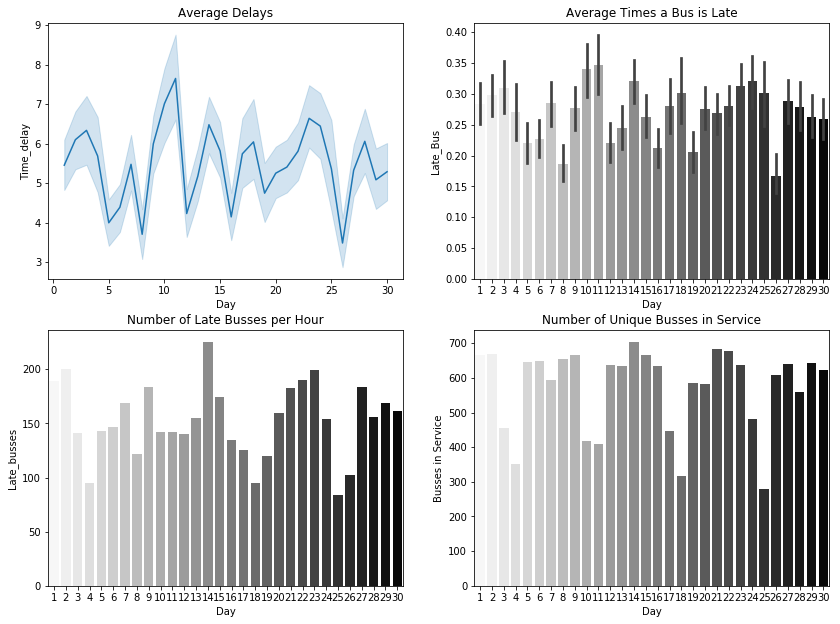

In [52]:
plt.figure(figsize=(14,16))
plt.subplot(321)
sns.lineplot(x= mta.ScheduledArrivalTime.dt.day , 
             y=mta.Time_delay, data=mta,)
plt.xlabel('Day')
plt.title('Average Delays')

plt.subplot(322)
sns.barplot(mta.ScheduledArrivalTime.dt.day,mta.Late_Bus,palette= "gist_gray_r")
plt.xlabel('Day')

plt.title('Average Times a Bus is Late')
 
plt.subplot(323)
sns.countplot(mta[mta.Late_Bus==1].ScheduledArrivalTime.dt.day , palette= "gist_gray_r")
plt.title('Number of Late Busses per Hour')
plt.xlabel('Day')

plt.ylabel('Late_busses')

plt.subplot(324)
#daydf = pd.DataFrame(mta.groupby('day').VehicleRef.unique())
#daydf = pd.DataFrame(daydf.VehicleRef.apply(lambda x : len(x)))
#daydf['day_of_month'] = daydf.index
#daydf.index = range(len(daydf))
#sns.barplot(daydf.day_of_month, daydf.VehicleRef,palette= "gist_gray_r")
sns.countplot(mta.ScheduledArrivalTime.dt.day, palette= "gist_gray_r")
plt.title('Number of Unique Busses in Service')
plt.xlabel('Day')
plt.ylabel('Busses in Service')

plt.show()

The days of the month seem to follow a weekly pattern. With the weekends having the least amount of late busses. The weekends also have fewer busses in service. The number of late busses doesn't seem to be affected by a larger number of busses in service.

In order to capture the cyclical nature of time sin/cos features of hour ,minute, and day of the week will be calculated so that the end of the cycle is show to be close to the beginning instead of far away.

In [53]:
# create sin cos features to capture cyclical nature
mta['sin_min'] = np.sin(mta['minute']*(2*np.pi/60))
mta['cos_min'] = np.cos(mta['minute']*(2*np.pi/60))
mta['sin_hour'] = np.sin(mta['hour']*(2.*np.pi/24))
mta['cos_hour'] = np.cos(mta['hour']*(2.*np.pi/24))
mta['sin_day_of_week'] = np.sin(mta['day_of_week']*(2.*np.pi/7))
mta['cos_day_of_week'] = np.cos(mta['day_of_week']*(2.*np.pi/7))

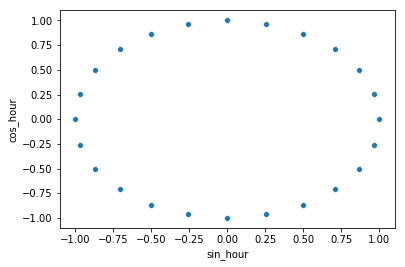

In [54]:
sns.scatterplot(mta.sin_hour,mta.cos_hour)

# Inbound and Outbound Late Busses and Delays

Let's see if there is any difference between the number of late busses of inbound vs outbound busses.

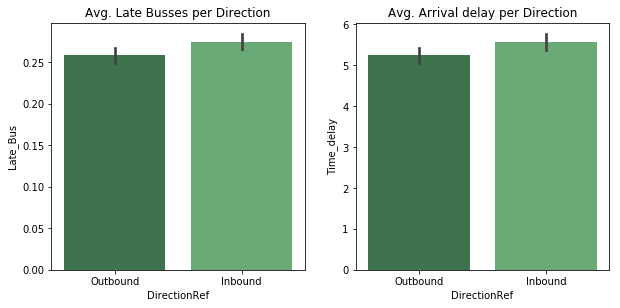

In [55]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.barplot(y=mta.Late_Bus,x=mta.DirectionRef,palette="Greens_d",orient='vertical',) 
plt.title('Avg. Late Busses per Direction')
plt.xticks(range(0,2), ['Outbound','Inbound'])

plt.subplot(222)
sns.barplot(y=mta.Time_delay,x=mta.DirectionRef,palette="Greens_d",orient='vertical',) 
plt.title('Avg. Arrival delay per Direction')
plt.xticks(range(0,2), ['Outbound','Inbound'])
plt.show()

The average number of late busses is higher with the inbound busses as well as the average arrival delay.

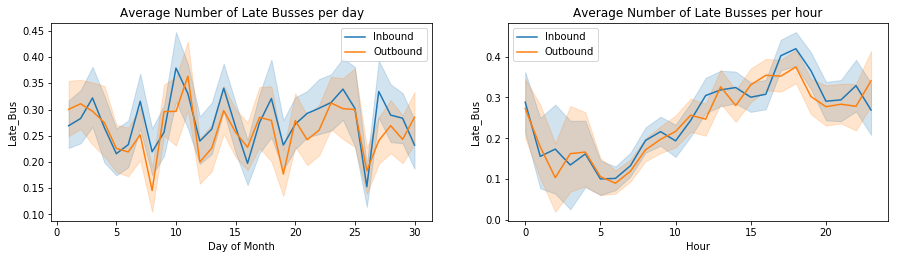

In [56]:
inbound_df = mta[mta.DirectionRef==1]
outbound_df = mta[mta.DirectionRef==0] 
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.lineplot(inbound_df.ScheduledArrivalTime.dt.day.sort_values(), inbound_df.Late_Bus, label='Inbound') 
sns.lineplot(outbound_df.ScheduledArrivalTime.dt.day.sort_values(), outbound_df.Late_Bus, label='Outbound')
plt.title('Average Number of Late Busses per day')
plt.xticks=(np.arange(0,30,.5))
plt.xlabel('Day of Month')
plt.subplot(222)
sns.lineplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.Late_Bus, label='Inbound') 
sns.lineplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.Late_Bus, label='Outbound')
plt.title('Average Number of Late Busses per hour')
plt.xlabel('Hour')
plt.xticks=(np.arange(0,30,.5))
plt.show() 

The inbound and outbound busses show the same pattern over time. With respect hour there are more late inbound busses thoughout most of the day.

In [57]:
# Test of the mean distance between stops of late and on-time busses 
print(stats.ttest_ind(inbound_df.Late_Bus, outbound_df.Late_Bus),'\n')


Ttest_indResult(statistic=2.3700992399332916, pvalue=0.01779427162382705) 



## Distance from stop vs Late Busses 

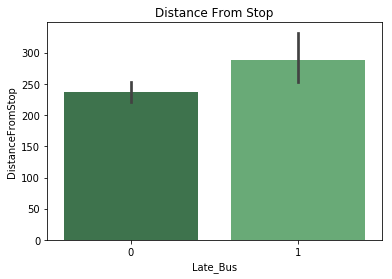

In [58]:
sns.barplot(x='Late_Bus',y='DistanceFromStop', data=mta, palette="Greens_d")
plt.title('Distance From Stop')
#plt.xticks(list(range(0,2)), ['On-Time','Late'])
plt.show()

In [59]:
print('Average distance from stop of on-time and late busses')
mta.groupby('Late_Bus').mean()[['DistanceFromStop']]

Average distance from stop of on-time and late busses


,DistanceFromStop
Late_Bus,
0,236.278869
1,288.835333


In [60]:
onTime_df = mta[mta.Late_Bus==1]
Late_df = mta[mta.Late_Bus==0] 
print('Ttest of average distance between stops of late and on-time Busses:')
print()
print(stats.ttest_ind(onTime_df.DistanceFromStop, Late_df.DistanceFromStop),'\n')

Ttest of average distance between stops of late and on-time Busses:

Ttest_indResult(statistic=2.825369133375402, pvalue=0.0047280538189934255) 



The ttest shows a significant difference between the average distance from a stop and late busses.

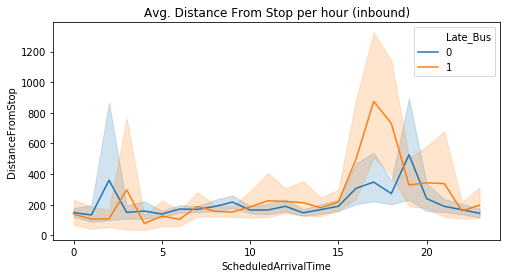

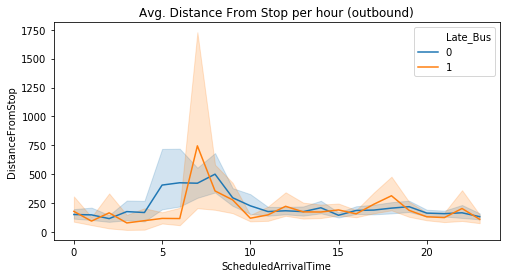

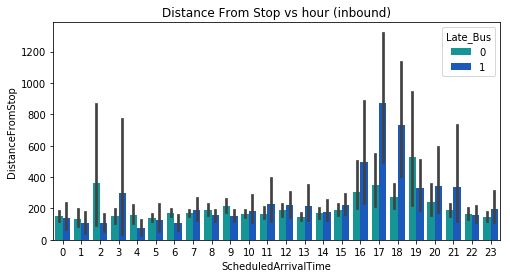

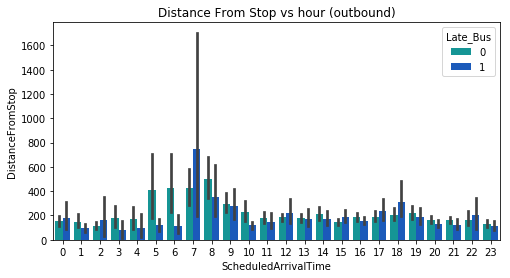

In [61]:
plt.figure(figsize=(8,4))
sns.lineplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.DistanceFromStop, hue=inbound_df.Late_Bus) 
plt.title('Avg. Distance From Stop per hour (inbound)')
plt.show()
plt.figure(figsize=(8,4))

sns.lineplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.DistanceFromStop, hue=outbound_df.Late_Bus)
plt.title('Avg. Distance From Stop per hour (outbound)')
#plt.xticks=(np.arange(0,30,.5))
plt.show() 
plt.figure(figsize=(8,4))
sns.barplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.DistanceFromStop,hue=inbound_df.Late_Bus,palette='winter_r')
plt.title('Distance From Stop vs hour (inbound)')
plt.show()
plt.figure(figsize=(8,4))
sns.barplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.DistanceFromStop,hue=outbound_df.Late_Bus,palette='winter_r')
plt.title('Distance From Stop vs hour (outbound)')
#sns.lineplot(mta.ScheduledArrivalTime.dt.hour.sort_values(), mta.DistanceFromStop, hue=mta.Late_Bus)

plt.show() 

There seems to be a pattern as the day goes on. The distacnce from stops increases for the inbound busses between 3pm and 9pm and for the outbound busses between 5am and 9am. The distance between stops for late busses is father than for the inbound busses than for the outbound. For the outbound busses it seems that distance between stops is greater for the on-time busses. This coincides with New Yorks rush hour. Since the busses are recorded approximately every ten minutes the busses are farther away from their stops for a longer amount of time because of traffic. This could possibly be why this pattern is showing. It doesn't explain the reason the distance between stops is greater for on time busses on the outbound side and the opposite for the inbound. This could be that there are more busses running at that time or that the busses are moving slower but the schedule accounts for those delays making the busses on time. 

I'm goding to create an indicator feature to mark this pattern.

In [62]:
# create rush our indicator feature
mta['rush_hour'] = np.where(np.logical_and(mta.hour>=5, mta.hour<=9) | np.logical_and(mta.hour>=15, mta.hour<=21),1,0)

## Which boroughs have the farthest distance from stop?


The route label prefixes signify the boroughs of New York that the operate in with the exception of routes that begin with "X". The "X" routes are express routes that a operate in all five boroghs and have large distances between stops. Here I will create a feature that groups the published line name(route) in to their areas of operation to condense dimentionality and for analysis.

In [63]:
# create new feature based on the route names and areas of operation based on prefix
def boroughs():
    mta['boroughs'] = '0'
    mta.loc[list(np.where((mta.PublishedLineName.str.contains('x')==False) & (mta.PublishedLineName.str.startswith('B')==True))[0]),'boroughs'] = 'Brooklyn'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('Bx')==True)[0]),'boroughs'] = 'Bronx'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('Q')==True)[0]),'boroughs'] = 'Queens'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('S')==True)[0]),'boroughs'] = 'Staten Island'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('M')==True)[0]),'boroughs'] = 'Manhattan'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('X')==True)[0]),'boroughs'] = 'X'
    mta['boroughs'] = mta.boroughs.astype('category')
boroughs()


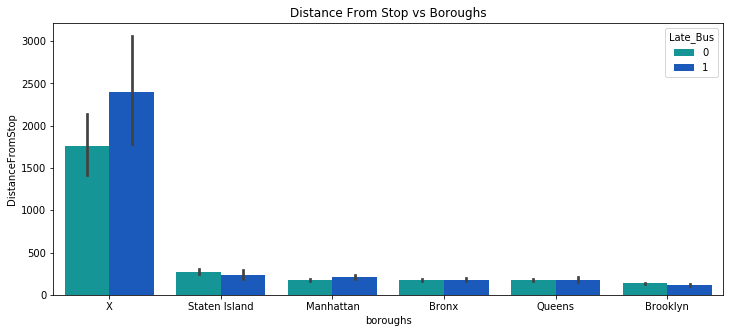

In [64]:
plt.figure(figsize=(12,5)) 
order = mta.groupby('boroughs').DistanceFromStop.mean().sort_values(ascending=False).index
sns.barplot(x='boroughs',y='DistanceFromStop' ,data=mta, hue=mta.Late_Bus,order=order,palette='winter_r')
plt.title('Distance From Stop vs Boroughs')
plt.show()

The "X" routes have the largest average distance from stops. It look like those routes are also resposible for the distance from stops for late busses being greater than the distance from stops for the on-time busses. Let's see what happens when we exclude the "X" routes.

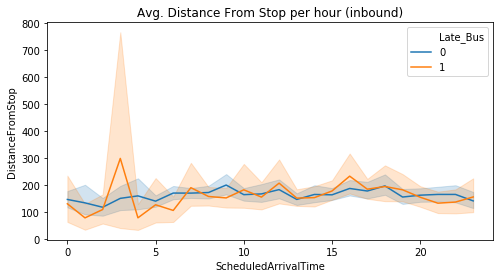

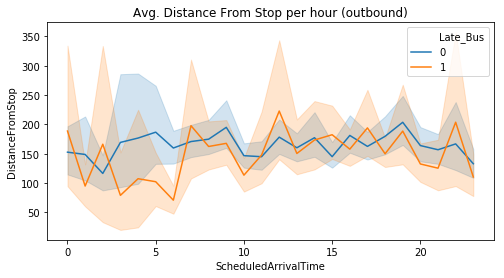

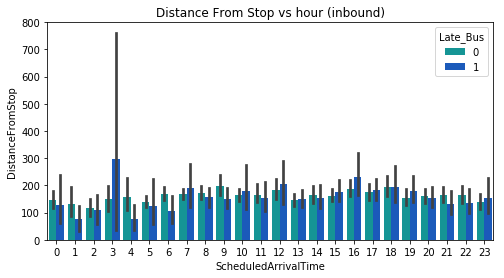

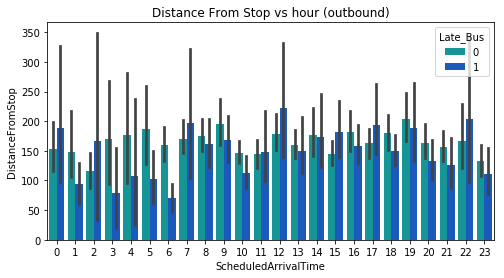

In [65]:
no_x_df = mta[mta.boroughs!='X']
inbound_df = no_x_df[no_x_df.DirectionRef==1]
outbound_df = no_x_df[no_x_df.DirectionRef==0] 

plt.figure(figsize=(8,4))
sns.lineplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.DistanceFromStop, hue=inbound_df.Late_Bus) 
plt.title('Avg. Distance From Stop per hour (inbound)')
plt.show()
plt.figure(figsize=(8,4))

sns.lineplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.DistanceFromStop, hue=outbound_df.Late_Bus)
plt.title('Avg. Distance From Stop per hour (outbound)')
#plt.xticks=(np.arange(0,30,.5))
plt.show() 
plt.figure(figsize=(8,4))
sns.barplot(inbound_df.ScheduledArrivalTime.dt.hour.sort_values(), inbound_df.DistanceFromStop,hue=inbound_df.Late_Bus,palette='winter_r')
plt.title('Distance From Stop vs hour (inbound)')
plt.show()
plt.figure(figsize=(8,4))
sns.barplot(outbound_df.ScheduledArrivalTime.dt.hour.sort_values(), outbound_df.DistanceFromStop,hue=outbound_df.Late_Bus,palette='winter_r')
plt.title('Distance From Stop vs hour (outbound)')
#sns.lineplot(mta.ScheduledArrivalTime.dt.hour.sort_values(), mta.DistanceFromStop, hue=mta.Late_Bus)

plt.show() 

Without the "X" routes the pattern pretty much disappears. This is something to be aware of when modeling because we don't want the algorithm to always focus in on the "X" routes.

In [66]:
#ttest between the means of the percentage of late busses of the days of the week
pvales = {}
for i in range(len(mta.boroughs.unique())):
        for j in range(i+1,6):
            print(mta.boroughs.unique()[i],' vs ',mta.boroughs.unique()[j]) 
            print(stats.ttest_ind(
                mta[mta.boroughs==mta.boroughs.unique()[i]]['Late_Bus'], 
                mta[mta.boroughs==mta.boroughs.unique()[j]]['Late_Bus']))
            pvales.update({(mta.boroughs.unique()[i],' vs ',mta.boroughs.unique()[j]):
                          stats.ttest_ind(
                          mta[mta.boroughs==mta.boroughs.unique()[i]]['Late_Bus'], 
                          mta[mta.boroughs==mta.boroughs.unique()[j]]['Late_Bus'])[1]})

X  vs  Queens
Ttest_indResult(statistic=4.576196356147252, pvalue=4.883213290612644e-06)
X  vs  Bronx
Ttest_indResult(statistic=4.103906882527308, pvalue=4.136919189552055e-05)
X  vs  Brooklyn
Ttest_indResult(statistic=2.4081071759363324, pvalue=0.016065014170120583)
X  vs  Manhattan
Ttest_indResult(statistic=0.9630428863119772, pvalue=0.3355814175889037)
X  vs  Staten Island
Ttest_indResult(statistic=4.580600640223705, pvalue=4.946621035167219e-06)
Queens  vs  Bronx
Ttest_indResult(statistic=-0.8153757537158265, pvalue=0.41488648667328176)
Queens  vs  Brooklyn
Ttest_indResult(statistic=-3.820298350786245, pvalue=0.0001342517650326766)
Queens  vs  Manhattan
Ttest_indResult(statistic=-5.619345523587515, pvalue=1.996197337306114e-08)
Queens  vs  Staten Island
Ttest_indResult(statistic=1.0018126351713634, pvalue=0.316492501868643)
Bronx  vs  Brooklyn
Ttest_indResult(statistic=-3.0751150222331156, pvalue=0.0021106256240832175)
Bronx  vs  Manhattan
Ttest_indResult(statistic=-4.9950563614674

In [67]:
# find all comparisons with pvalues > .05
non_significant = [i for i in pvales if pvales.get(i)>.05]
non_significant

[('X', ' vs ', 'Manhattan'),
 ('Queens', ' vs ', 'Bronx'),
 ('Queens', ' vs ', 'Staten Island'),
 ('Bronx', ' vs ', 'Staten Island')]

## Compare boroughs to late busses

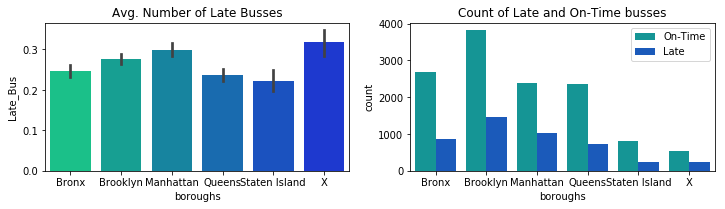

In [68]:
plt.figure(figsize=(12,6)) 
plt.subplot(221)
sns.barplot(x='boroughs',y='Late_Bus' ,data=mta,  palette='winter_r' )
plt.title('Avg. Number of Late Busses')

plt.subplot(222)
sns.countplot(x='boroughs',hue='Late_Bus' ,data=mta,  palette='winter_r' )
plt.legend(['On-Time','Late'])
plt.title('Count of Late and On-Time busses')
plt.show()

In [69]:
# chi-square test to test significance of group size
borough_count_table = pd.crosstab(mta.Late_Bus,mta.boroughs)
print('Chi-square Test Results significance of group size of boroughs')
print(stats.chisquare(borough_count_table, axis=None))


Chi-square Test Results significance of group size of boroughs
Power_divergenceResult(statistic=9816.609552030679, pvalue=0.0)


In [70]:
mta.groupby('boroughs').Late_Bus.agg(['mean','count'])

,mean,count
boroughs,,
Bronx,0.246552,3553
Brooklyn,0.275934,5302
Manhattan,0.299766,3416
Queens,0.237957,3093
Staten Island,0.222852,1059
X,0.317259,788


Although the "X" routes are represented the least in the dataset they have the highest agverage of late busses. 

#  Geospacial features

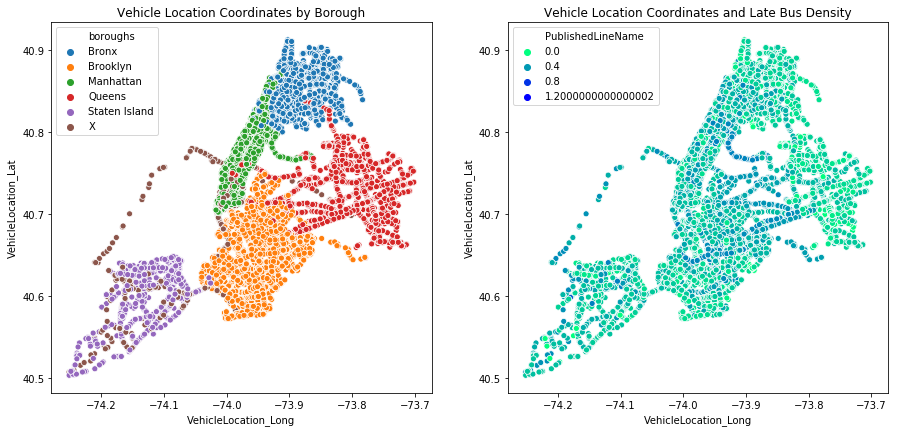

In [71]:
mean_late = mta.PublishedLineName.map(dict(mta.groupby('PublishedLineName').Late_Bus.mean().sort_values(ascending=False)))
plt.figure(figsize=(15,15))
 
plt.subplot(222)
sns.scatterplot(mta.VehicleLocation_Long,mta.VehicleLocation_Lat,hue=mean_late, palette='winter_r')
plt.title('Vehicle Location Coordinates and Late Bus Density')
 
plt.subplot(221)
sns.scatterplot(mta.VehicleLocation_Long,mta.VehicleLocation_Lat,hue=mta.boroughs)
plt.title('Vehicle Location Coordinates by Borough')
plt.show()

Above are scatterplots of the lattitudes and longitudes of the vehicle locations. You can see the shape of New York made from the lats and longs. There doesn't seem to be any points that fall far outside of the area that we are concerned with. The left plot shows the busses grouped by their respective areas of operation and the left highlights the areas where the average number of late busses is the greatest. This may indicate that vehicle location may be a good predictor of whether a bus is going to be late or not. Since there is no meaningful relationship between the raw lattitude and longitude I will create a couple of features to cut down on the dimentionality and well as creating something useful that a model such a Random Forest could use. 

In [72]:
# function to conver lat and long to zip code

def geo_to_zip(lat,long,zip_type):
    from uszipcode import SearchEngine
    from datetime import datetime
    startTime = datetime.now()
     
    search = SearchEngine(simple_zipcode=True)
    mta['col'] = mta[lat].astype(str)+' '+mta[long].astype(str)
    mta[zip_type] = mta['col'].apply(lambda x: search.by_coordinates(float(x.split()[0]),
                                    float(x.split()[1]), radius=10, returns=5)[0].values()[0])
   
    print(datetime.now() - startTime)
    print('done')
    mta.drop('col',1,inplace=True)
geo_to_zip('OriginLat', 'OriginLong','Orig_zip')
geo_to_zip('DestinationLat','DestinationLong','Dest_zip')
geo_to_zip('VehicleLocation_Lat','VehicleLocation_Long','VL_Zip')

0:02:59.815292
done
0:02:38.839012
done
0:02:39.793812
done


In [73]:

# fucntion to convert to compute distance between two points and create a columns of those distances
def distance_between_points(lat1,long1,lat2,long2,to_from):
    import mpu
    from datetime import datetime
    startTime = datetime.now()
    mta['point1'] =mta[lat1].astype(str)+" "+mta[long1].astype(str)
    mta['point2'] = mta[lat2].astype(str)+" "+mta[long2].astype(str)

    mta[to_from] = mta['point1']+" "+mta['point2']
    mta[to_from] = mta[to_from].apply(lambda x : mpu.haversine_distance((float(x.split()[0]), float(x.split()[1])),
                                                                              (float(x.split()[2]), float(x.split()[3]))))
    mta.drop('point1',1,inplace=True)
    mta.drop('point2',1,inplace=True)
    print(datetime.now() - startTime)
    print('done')
    return;


distance_between_points('VehicleLocation_Lat','VehicleLocation_Long','DestinationLat','DestinationLong','VL_to_Dest')
distance_between_points('VehicleLocation_Lat','VehicleLocation_Long','OriginLat', 'OriginLong','VL_to_Origin')
distance_between_points('DestinationLat','DestinationLong','OriginLat', 'OriginLong','Dest_to_Origin') 

0:00:00.160604
done
0:00:00.160537
done
0:00:00.156582
done


In [74]:
# winsorizing the distances to reduce outliers
mta["winVL_to_Dest"]  = winsorize(mta["VL_to_Dest"], (0, .1)) 
mta["winVL_to_Origin"] =winsor_distVL= winsorize(mta["VL_to_Origin"], (0, .1)) 
mta["winDest_to_Origin"] =winsor_distOD= winsorize(mta["Dest_to_Origin"], (0, .1))

In [75]:
#create geohash features from lat and long
import pygeohash as gh
mta['VL_geohash']=mta.apply(lambda x: gh.encode(x.VehicleLocation_Lat, x.VehicleLocation_Long, precision=5), axis=1).astype('category')
mta['O_geohash']=mta.apply(lambda x: gh.encode(x.OriginLat, x.OriginLong, precision=5), axis=1).astype('category')
mta['D_geohash']=mta.apply(lambda x: gh.encode(x.DestinationLat, x.DestinationLong, precision=5), axis=1).astype('category')

In [76]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,day,hour,minute,weekday,day_of_week,winsor_dist,increased_Late,time_of_day,is_midweek,sin_min,cos_min,sin_hour,cos_hour,sin_day_of_week,cos_day_of_week,rush_hour,boroughs,Orig_zip,Dest_zip,VL_Zip,VL_to_Dest,VL_to_Origin,Dest_to_Origin,winVL_to_Dest,winVL_to_Origin,winDest_to_Origin,VL_geohash,O_geohash,D_geohash
0,2017-06-01 00:03:30,1,X17,E 57 ST/3 AV,40.760429,-73.967674,ARDEN HTS HUGENOT AV via NJ via DRMGOOLE,40.543644,-74.196716,NYCT_2725,40.563053,-74.175912,ARTHUR KILL RD/ANNADALE RD,157.0,2017-06-01 00:03:56,2017-06-01 00:01:32,2.0,0,1,0,1,Thursday,3,157.0,0,night,1,0.104528,0.994522,0.0,1.0,0.433884,-0.900969,0,X,10022,10312,10312,2.783357,28.110445,30.893679,2.783357,9.965182,14.301103,dr5qb,dr5ru,dr5nx
1,2017-06-01 00:13:31,0,Q30,ARCHER AV /SUTPHIN BL,40.700489,-73.807884,LITTLE NECK L NECK PKY,40.764297,-73.725914,NYCT_8443,40.764774,-73.725227,NASSAU BL/LITTLE NECK PY,77.0,2017-06-01 00:13:57,2017-06-01 00:02:00,11.0,1,1,0,2,Thursday,3,77.0,0,night,1,0.207912,0.978148,0.0,1.0,0.433884,-0.900969,0,Queens,11435,11005,11005,0.078491,9.980095,9.901728,0.078491,9.965182,9.901728,dr5xf,dr5x8,dr5xf
2,2017-06-01 00:03:40,1,Bx36,RANDALL AV/OLMSTEAD AV,40.818676,-73.851555,WASHINGTON HTS GW BRIDGE,40.849033,-73.937309,NYCT_281,40.822321,-73.855112,LAFAYETTE AV/PUGSLEY AV,29.0,2017-06-01 00:03:56,2017-06-01 00:02:51,1.0,0,1,0,2,Thursday,3,29.0,0,night,1,0.207912,0.978148,0.0,1.0,0.433884,-0.900969,0,Bronx,10473,10032,10473,7.526045,0.503847,7.965199,7.526045,0.503847,7.965199,dr72p,dr72p,dr72m
3,2017-06-01 00:13:47,0,Q17,MERRICK BL/ARCHER AV,40.704906,-73.793304,FLUSHING MAIN ST STA,40.761745,-73.829529,NYCT_8417,40.740906,-73.787620,HORACE HARDING EXP/185 ST,162.0,2017-06-01 00:14:07,2017-06-01 00:09:53,4.0,0,1,0,9,Thursday,3,162.0,0,night,1,0.809017,0.587785,0.0,1.0,0.433884,-0.900969,0,Queens,11433,11354,11365,4.222787,4.031574,7.018643,4.222787,4.031574,7.018643,dr5xb,dr5x8,dr5rz
4,2017-06-01 00:13:38,0,B38,TILLARY ST/CADMAN PZ E,40.696106,-73.990364,RIDGEWOOD METRO AV,40.713341,-73.914688,NYCT_7228,40.687247,-73.976757,FULTON ST/LAFAYETTE AV,10.0,2017-06-01 00:13:57,2017-06-01 00:14:50,0.0,0,1,0,14,Thursday,3,10.0,0,night,1,0.994522,0.104528,0.0,1.0,0.433884,-0.900969,0,Brooklyn,11201,11237,11217,5.983077,1.512116,6.660744,5.983077,1.512116,6.660744,dr5rk,dr5rs,dr5rw


In [77]:
ffff

NameError: name 'ffff' is not defined

# Preprcessing and Modeling

In [78]:

# import need libraries for models
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import ensemble 
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# fucntion to plot AUC/ROC curve and score
def AUC_ROC_plot(model,X_train,y_train,X_test,y_test,color): 
    model.fit(X_train , y_train)
    y_prob = cross_val_predict(model, X_test, y_test, method='predict_proba',cv=5)    
    auc = roc_auc_score(y_test,y_prob[:,1])
    print('AUC: %.3f' % auc)
    fpr, tpr,thresholds = roc_curve(y_test,y_prob[:,1])
    plt.plot(fpr,tpr,color)    
    plt.plot([0.0,1.0],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics')
    plt.xlim([0.0,1.0])     
    plt.ylim([0.0,1.0])
    return;
 
# function to print metrics for comparison 
def Metrics(model, X_train , y_train, X_test, y_test,):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test) 
    y_prob = cross_val_predict(model, X_test, y_test, method='predict_proba',cv=5)    
    auc = roc_auc_score(y_test,y_prob[:,1])  
   
    print()
    print("Consfusion Matrix")
    print(pd.crosstab(y_test,y_pred))
    print()

    # Classification report
    print("Classification Report")
    from sklearn.metrics import classification_report   
    target_names = ['On-time','Late']
    print(classification_report(y_test,y_pred, target_names=target_names))    
    print("Train Score",model.score(X_train, y_train))
    print("Test Score",model.score(X_test, y_test))
    print("Recall Score",recall_score(y_test,y_pred))
    AUC_ROC_plot(model,X_train,y_train,X_test,y_test,'r')
    plt.show() 
    return;

# the next four fuctions convert features

# convert categorical to target mean in the training set
def cat_to_mean(X_train,X_test,cols=[]):
    X_trainC =  X_train.copy()
    X_testC =  X_test.copy()
    for col in X_trainC[cols]:
        Xmap = dict(X_train.groupby([col]).Late_Bus.mean())
        X_trainC[col] = X_trainC[col].map(Xmap)
        X_testC[col] =X_testC[col].map(Xmap)
        X_trainC.replace([np.inf, -np.inf], 0, inplace=True)
        X_testC.replace([np.inf, -np.inf], 0, inplace=True)
        X_trainC.fillna(0, inplace=True)
        X_testC.fillna(0, inplace=True)     

    return X_trainC, X_testC;

 

# convert categorical feature to the counts in the training set
def cat_to_count(X_train,X_test,cols=[]):
    X_trainC = X_train.copy()
    X_testC =  X_test.copy()
    for col in X_trainC[cols]:
        Xmap = dict(X_trainC[col].value_counts())
        X_trainC[col] = X_trainC[col].map(Xmap)
        X_testC[col] = X_testC[col].map(Xmap)
        X_trainC.replace([np.inf, -np.inf], 0, inplace=True)
        X_testC.replace([np.inf, -np.inf], 0, inplace=True)
        X_trainC.fillna(0, inplace=True)
        X_testC.fillna(0, inplace=True)
 
    return X_trainC, X_testC;

 

In [79]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime', 'Time_delay', 'Late_Bus',
       'day', 'hour', 'minute', 'weekday', 'day_of_week', 'winsor_dist',
       'increased_Late', 'time_of_day', 'is_midweek', 'sin_min', 'cos_min',
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'rush_hour', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'VL_to_Dest',
       'VL_to_Origin', 'Dest_to_Origin', 'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash'],
      dtype='object')

Some of the features will be dropped initally because eithere the are redundant or they were used to create the target variable. These features are: 'RecordedAtTime','DistanceFromStop','ExpectedArrivalTime', 'ScheduledArrivalTime', 'Time_delay', 'day', 'hour', 'minute',  'OriginLat', 'OriginLong','VehicleLocation_Lat','VehicleLocation_Long','Orig_zip', 'Dest_zip', 'VL_Zip'.

There are some features that may be redundant but I'm not sure which will add more predictive power over the others so they will be left in and eliminated during feature selection.

In [80]:
# categorical features description
mta[mta.select_dtypes('category').columns].describe()

,DirectionRef,PublishedLineName,OriginName,DestinationName,VehicleRef,NextStopPointName,weekday,time_of_day,boroughs,VL_geohash,O_geohash,D_geohash
count,17211,17211,17211,17211,17211,17211,17211,17211,17211,17211,17211,17211
unique,2,236,475,561,4172,5873,7,4,6,69,58,58
top,1,B6,E 126 ST/2 AV,WASHINGTON HTS GW BRIDGE,NYCT_4242,138 ST/37 AV,Thursday,morning,Brooklyn,dr5ru,dr72m,dr72m
freq,8676,325,295,225,14,38,3306,5766,5302,1386,1213,1122


Since there are a features that have a very large cardinality those features will be converted to counts instead of One-hot-encoding to reduce dimensionality and still retain some information. 

In [173]:
modeling_df = mta[['Late_Bus', 'DirectionRef',  'PublishedLineName',
        'weekday',   'winsor_dist', 'NextStopPointName','Orig_zip',
       'increased_Late', 'time_of_day', 'is_midweek', 'day_of_week',
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'rush_hour', 'boroughs', 'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash']]
 

dummies = ['time_of_day','weekday', 'boroughs', 'PublishedLineName','Orig_zip','VL_geohash', 'O_geohash', 'D_geohash',]
counts = ['NextStopPointName']


modeling_df = mta[['DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName', 'DistanceFromStop',
         'Late_Bus',
       'day', 'hour', 'minute', 'weekday', 'day_of_week', 'winsor_dist',
       'increased_Late', 'time_of_day', 'is_midweek', 'sin_min', 'cos_min',
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'rush_hour', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'VL_to_Dest',
       'VL_to_Origin', 'Dest_to_Origin', 'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash']]



dummies = []
counts = [ 'DirectionRef', 'PublishedLineName', 'OriginName',
'DestinationName',
'VehicleRef',
'NextStopPointName',
'weekday',

 'time_of_day',
'boroughs',
'Orig_zip', 'Dest_zip', 'VL_Zip',
'VL_geohash', 'O_geohash', 'D_geohash']


modeling_df = mta[[  'DirectionRef', 'PublishedLineName', 'OriginName',
        'DestinationName',   
        'NextStopPointName','Late_Bus', 'VehicleRef',
        'weekday', 'day_of_week', 'winsor_dist',
       'increased_Late', 'time_of_day', 'is_midweek', 'sin_min', 'cos_min',
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'boroughs', 'rush_hour', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash',
        ]]
#modeling_df = mta[['Late_Bus','PublishedLineName']]

dummies = ['PublishedLineName',  'time_of_day','OriginName',  'DestinationName','VL_geohash', 'O_geohash', 'D_geohash',
         'weekday', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip']
#dummies = ['PublishedLineName']
counts = ['NextStopPointName', 'VehicleRef' ]

modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)
 
X  = modeling_df
Y = modeling_df.Late_Bus


#modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)


X  = modeling_df
Y = modeling_df.Late_Bus

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)  

In [174]:
# count transformation 
X_train, X_test  = cat_to_count(X_train,X_test,counts)

In [163]:
X_train.head()

,DirectionRef,NextStopPointName,Late_Bus,VehicleRef,day_of_week,winsor_dist,increased_Late,is_midweek,sin_min,cos_min,sin_hour,cos_hour,sin_day_of_week,cos_day_of_week,rush_hour,winVL_to_Dest,winVL_to_Origin,winDest_to_Origin,PublishedLineName_B11,PublishedLineName_B12,PublishedLineName_B13,PublishedLineName_B14,PublishedLineName_B15,PublishedLineName_B16,PublishedLineName_B17,...,VL_Zip_11378,VL_Zip_11379,VL_Zip_11385,VL_Zip_11411,VL_Zip_11412,VL_Zip_11413,VL_Zip_11415,VL_Zip_11416,VL_Zip_11417,VL_Zip_11418,VL_Zip_11419,VL_Zip_11421,VL_Zip_11422,VL_Zip_11423,VL_Zip_11426,VL_Zip_11427,VL_Zip_11428,VL_Zip_11429,VL_Zip_11430,VL_Zip_11432,VL_Zip_11433,VL_Zip_11434,VL_Zip_11435,VL_Zip_11436,VL_Zip_11581
9110,0,4,0,2,4,19.0,1,0,0.743145,-6.691306e-01,1.224647e-16,-1.000000,-0.433884,-0.900969,0,0.020788,5.001193,5.001092,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6048,1,1,1,5,6,91.0,1,0,1.000000,6.123234e-17,-9.659258e-01,-0.258819,-0.781831,0.623490,1,1.770377,7.452457,8.501800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6825,1,7,0,3,1,141.0,0,0,-0.743145,6.691306e-01,0.000000e+00,1.000000,0.781831,0.623490,0,0.141710,3.028818,2.891874,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9411,1,1,0,4,4,47.0,0,0,0.104528,9.945219e-01,-7.071068e-01,0.707107,-0.433884,-0.900969,1,3.710918,2.826763,6.479320,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10765,0,18,0,3,0,204.0,0,0,0.309017,9.510565e-01,-5.000000e-01,0.866025,0.000000,1.000000,0,5.559632,0.808703,6.266285,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
['DirectionRef', 'NextStopPointName', 'Late_Bus', 'VehicleRef',
       'day_of_week', 'winsor_dist', 'increased_Late', 'is_midweek', 'sin_min',
       'cos_min', 'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'rush_hour', 'winVL_to_Dest', 'winVL_to_Origin', 'winDest_to_Origin',
       'PublishedLineName_B11', 'PublishedLineName_B12',
       'PublishedLineName_B13', 'PublishedLineName_B14',
       'PublishedLineName_B15', 'PublishedLineName_B16',
       'PublishedLineName_B17', 'PublishedLineName_B2',
       'PublishedLineName_B20', 'PublishedLineName_B24',
       'PublishedLineName_B25', 'PublishedLineName_B26',
       'PublishedLineName_B3', 'PublishedLineName_B31',
       'PublishedLineName_B32', 'PublishedLineName_B35',
       'PublishedLineName_B36', 'PublishedLineName_B37',
       'PublishedLineName_B38', 'PublishedLineName_B39',
       'PublishedLineName_B4', 'PublishedLineName_B41',
       'PublishedLineName_B42', 'PublishedLineName_B43',
       'PublishedLineName_B44', 'PublishedLineName_B44-SBS',
       'PublishedLineName_B45', 'PublishedLineName_B46',
       'PublishedLineName_B46-SBS', 'PublishedLineName_B47',
       'PublishedLineName_B48', 'PublishedLineName_B49',
       'PublishedLineName_B52', 'PublishedLineName_B54',
       'PublishedLineName_B57', 'PublishedLineName_B6',
       'PublishedLineName_B60', 'PublishedLineName_B61',
       'PublishedLineName_B62', 'PublishedLineName_B63',
       'PublishedLineName_B64', 'PublishedLineName_B65',
       'PublishedLineName_B67', 'PublishedLineName_B68',
       'PublishedLineName_B69', 'PublishedLineName_B7',
       'PublishedLineName_B70', 'PublishedLineName_B74',
       'PublishedLineName_B8', 'PublishedLineName_B82',
       'PublishedLineName_B83', 'PublishedLineName_B84',
       'PublishedLineName_B9', 'PublishedLineName_Bx1',
       'PublishedLineName_Bx10', 'PublishedLineName_Bx11',
       'PublishedLineName_Bx12', 'PublishedLineName_Bx12-SBS',
       'PublishedLineName_Bx13', 'PublishedLineName_Bx15',
       'PublishedLineName_Bx16', 'PublishedLineName_Bx17',
       'PublishedLineName_Bx18', 'PublishedLineName_Bx19',
       'PublishedLineName_Bx2', 'PublishedLineName_Bx20',
       'PublishedLineName_Bx21', 'PublishedLineName_Bx22',
       'PublishedLineName_Bx24', 'PublishedLineName_Bx26',
       'PublishedLineName_Bx27', 'PublishedLineName_Bx28',
       'PublishedLineName_Bx29', 'PublishedLineName_Bx3',
       'PublishedLineName_Bx30', 'PublishedLineName_Bx31',
       'PublishedLineName_Bx32', 'PublishedLineName_Bx33',
       'PublishedLineName_Bx34', 'PublishedLineName_Bx35',
       'PublishedLineName_Bx36', 'PublishedLineName_Bx38'],
      dtype='object')

Next we'll take at a look at the correlations of the variables to the target.

In [98]:
from sklearn.feature_selection import RFE
# feature extraction
rfe = RFE(rfc, n_features_to_select=100)
# fit on train set
fit = rfe.fit(X_train, y_train)
# transform train set
recursive_features = fit.transform(X_train)

In [115]:
X_train = X_train.iloc[:,pd.DataFrame(recursive_features).columns] 
X_test = X_test.iloc[:,pd.DataFrame(recursive_features).columns] 

In [116]:
# find correlations to target
corr_matrix = X_train.corr().abs()
corr_to_target = corr_matrix['Late_Bus'].sort_values(ascending=False)



In [175]:
# drop the target from independent features
X_train.drop('Late_Bus',1,inplace=True)
X_test.drop('Late_Bus',1,inplace=True)

In [118]:
# top 30 features with the highest correlations to target
corr_to_target[:30]

Late_Bus                      1.000000
winVL_to_Origin               0.210330
sin_hour                      0.179964
winVL_to_Dest                 0.138866
increased_Late                0.096487
winDest_to_Origin             0.086794
NextStopPointName             0.084176
day_of_week                   0.069169
PublishedLineName_B41         0.057084
PublishedLineName_B35         0.054593
PublishedLineName_B12         0.039506
cos_day_of_week               0.037012
PublishedLineName_B25         0.036143
PublishedLineName_Bx15        0.036046
PublishedLineName_B46-SBS     0.033834
PublishedLineName_B15         0.030349
PublishedLineName_Bx10        0.029656
sin_day_of_week               0.028891
PublishedLineName_B36         0.028495
PublishedLineName_B9          0.024088
PublishedLineName_B42         0.024055
PublishedLineName_Bx32        0.024023
PublishedLineName_Bx21        0.022745
PublishedLineName_B6          0.022634
PublishedLineName_B68         0.022305
PublishedLineName_B82    

The highest correation with the target is the distance to the origin and it really isn't that high. Next I'll use SelcectKbest to choose the top 30 of our list of almost 2000 features. Since there were many rare levels in the categorical features I expect many of the features from OHE to be constant.

In [ ]:
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [176]:
# Automatic feature selection with SelectKbest
import sklearn.feature_selection 
select =sklearn.feature_selection.SelectKBest(k=200)
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X_train.columns[i] for i in indicies_selected]
X_selected = X_train[colnames_selected]
print(colnames_selected)
#X = X[colnames_selected]
#X = X[colnames_selected]
 
X_train = X_train[colnames_selected]
X_test = X_test[colnames_selected]

['NextStopPointName', 'day_of_week', 'increased_Late', 'sin_hour', 'sin_day_of_week', 'cos_day_of_week', 'winVL_to_Dest', 'winVL_to_Origin', 'winDest_to_Origin', 'PublishedLineName_B12', 'PublishedLineName_B15', 'PublishedLineName_B25', 'PublishedLineName_B35', 'PublishedLineName_B36', 'PublishedLineName_B41', 'PublishedLineName_B42', 'PublishedLineName_B46-SBS', 'PublishedLineName_B9', 'PublishedLineName_Bx10', 'PublishedLineName_Bx15', 'PublishedLineName_Bx32', 'PublishedLineName_Bx6', 'PublishedLineName_M100', 'PublishedLineName_M102', 'PublishedLineName_M15', 'PublishedLineName_M2', 'PublishedLineName_M4', 'PublishedLineName_M60-SBS', 'PublishedLineName_M7', 'PublishedLineName_Q12', 'PublishedLineName_Q20A', 'PublishedLineName_Q20B', 'PublishedLineName_Q27', 'PublishedLineName_Q3', 'PublishedLineName_Q54', 'PublishedLineName_Q56', 'PublishedLineName_Q58', 'PublishedLineName_Q83', 'PublishedLineName_Q84', 'time_of_day_evening', 'time_of_day_morning', 'OriginName_165 ST/TERMINAL', 'O

C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 210  304  381  425  443  450  497  515  516  548  639  642  736 1040
 1067 1223 1563 1575 1798 1879] are constant.
  UserWarning)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [134]:
names = X.drop('Late_Bus',1).columns.values[select.get_support()]
scores = select.scores_[select.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                                           Feat_names    F_Scores
6                                     winVL_to_Origin  637.178912
3                                            sin_hour  460.763846
21                                time_of_day_morning  290.025352
5                                       winVL_to_Dest  270.680939
20                                time_of_day_evening  168.090397
2                                      increased_Late  129.361931
7                                   winDest_to_Origin  104.489602
0                                   NextStopPointName   98.236822
1                                         day_of_week   66.178555
68                                     weekday_Monday   63.939928
12                              PublishedLineName_B41   45.004487
11                              PublishedLineName_B35   41.150995
64                                    D_geohash_dr5rq   33.121655
74                                     Orig_zip_10022   32.128268
27        

Next, to cut down dimentionality a little more, I am going to select the features with F-scores greater than 40.

In [ ]:
Keep = list(ns_df_sorted.iloc[list(np.where(ns_df_sorted.F_Scores>0)[0]),:].Feat_names.values)
Keep

In [ ]:
X_train = X_train[Keep]
X_test = X_test[Keep]

In [ ]:
X_train.head()

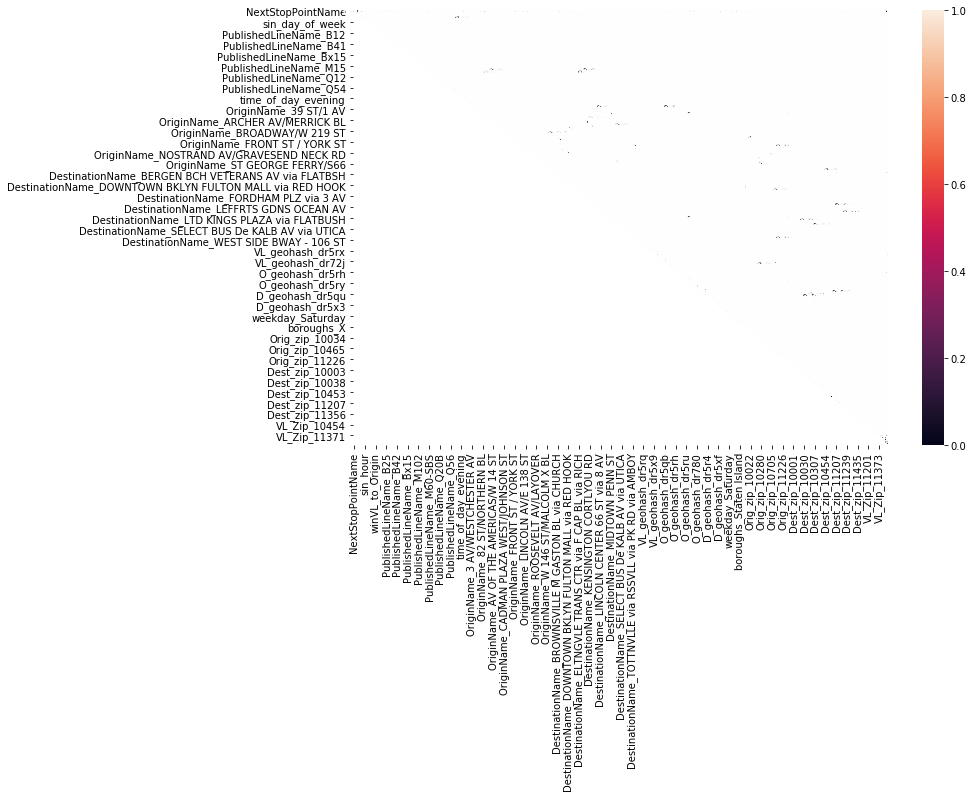

In [165]:
corr_matrix = X_train.corr().abs().where(np.triu(np.ones(X_train.corr().abs().shape), k=1).astype(np.bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

Here I will check for and drop features that are highly correlated with each other.

In [166]:
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.50)]
print('Columns to drop: ' , (len(to_drop)))
to_drop

Columns to drop:  83


['sin_day_of_week',
 'cos_day_of_week',
 'time_of_day_evening',
 'time_of_day_morning',
 'OriginName_168 ST/AUDUBON AV',
 'OriginName_39 ST/1 AV',
 'OriginName_41 RD/MAIN ST',
 'OriginName_ALABAMA AV / FULTON ST',
 'OriginName_AV OF THE AMERICAS/W 14 ST',
 'OriginName_BROADWAY/W 106 ST',
 'OriginName_BROADWAY/W 219 ST',
 'OriginName_CADMAN PLAZA WEST/JOHNSON ST',
 'OriginName_FRONT ST / YORK ST',
 'OriginName_JAMAICA AV/170 ST',
 'OriginName_LGA/TERMINAL D',
 'OriginName_NOSTRAND AV/GRAVESEND NECK RD',
 'OriginName_ROOSEVELT AV/LAYOVER',
 'OriginName_ST CLAIRE PL/W 125 ST',
 'OriginName_WASHINGTON PLZ / WASHINGTON PLZ',
 'DestinationName_BED-STUY WOODHULL HOSP',
 'DestinationName_BROWNSVILLE M GASTON BL via CHURCH',
 'DestinationName_BWAY JCT ALABAMA AV via FULTON',
 'DestinationName_CONEY ISLAND W 37 ST',
 'DestinationName_DNTWN BKLYN CADMAN PLZ via FLATBSH',
 'DestinationName_DOWNTOWN BKLYN FULTON MALL via RED HOOK',
 'DestinationName_E HARLM 1 AV-125 ST via BDWY via AMSTRDM',
 'Dest

In [ ]:
X_train.drop(to_drop,1,inplace=True)
X_test.drop(to_drop,1,inplace=True)


In [ ]:
corr_matrix = X_train.corr().abs().where(np.triu(np.ones(X_train.corr().abs().shape), k=1).astype(np.bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=False)
plt.show()

In [ ]:
X_train.head()

In [ ]:
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# balance class using SMOTE
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=20)
#X_trainB, y_trainB = sm.fit_sample(X_train, y_train)

In [177]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=20)
X_trainB, y_trainB = ros.fit_sample(X_train, y_train)

In [178]:
# scale
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_train)
X_trainS = sclr.transform(X_trainB)
X_testS = sclr.transform(X_test)


In [ ]:
from sklearn.preprocessing import normalize
X_trainS = normalize(X_trainB)
X_testS = normalize(X_test)


Random_Forest


Consfusion Matrix
col_0        0    1
Late_Bus           
0         2155  359
1          583  346

Classification Report
              precision    recall  f1-score   support

     On-time       0.79      0.86      0.82      2514
        Late       0.49      0.37      0.42       929

    accuracy                           0.73      3443
   macro avg       0.64      0.61      0.62      3443
weighted avg       0.71      0.73      0.71      3443

Train Score 0.9959948575949367
Test Score 0.7264013941330235
Recall Score 0.37244348762109797
AUC: 0.646


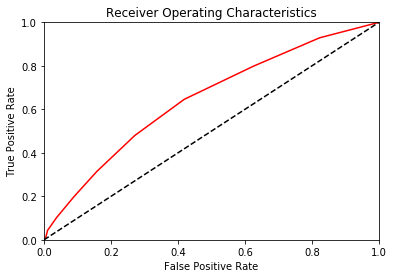

0:00:00
Gradient_Boost


Consfusion Matrix
col_0        0    1
Late_Bus           
0         1689  825
1          312  617

Classification Report
              precision    recall  f1-score   support

     On-time       0.84      0.67      0.75      2514
        Late       0.43      0.66      0.52       929

    accuracy                           0.67      3443
   macro avg       0.64      0.67      0.63      3443
weighted avg       0.73      0.67      0.69      3443

Train Score 0.6976364715189873
Test Score 0.66976474005228
Recall Score 0.6641550053821313
AUC: 0.710


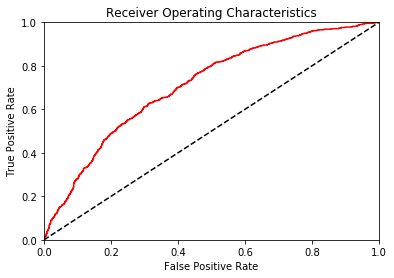

0:00:00


In [179]:
models = [] 
 
models.append(('Random_Forest' , ensemble.RandomForestClassifier(n_estimators=10,class_weight='balanced',random_state=20)))  

models.append(('Gradient_Boost' , ensemble.GradientBoostingClassifier()))
 
 
 
for name ,model in models:
    
    print(str(name))
    print()
    startTime = datetime.now()  
 
    Metrics(model, X_trainS , y_trainB, X_testS, y_test)
    startTime = datetime.now()  
    print(datetime.now() - startTime)

Logistic Regression


Consfusion Matrix
col_0        0    1
Late_Bus           
0         1680  834
1          329  600

Classification Report
              precision    recall  f1-score   support

     On-time       0.84      0.67      0.74      2514
        Late       0.42      0.65      0.51       929

    accuracy                           0.66      3443
   macro avg       0.63      0.66      0.63      3443
weighted avg       0.72      0.66      0.68      3443

Train Score 0.6810225474683544
Test Score 0.6622131861748475
Recall Score 0.6458557588805167
AUC: 0.686


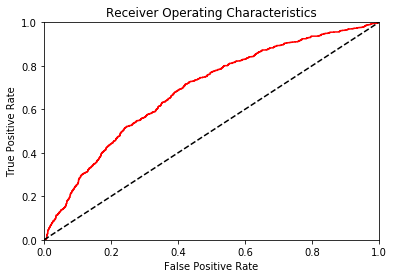

0:00:00


In [180]:
 
lr = LogisticRegression( solver='liblinear',class_weight='balanced')
AUCscore = {}
Recallscore = {}
 
 
print('Logistic Regression')
print()
startTime = datetime.now()  

Metrics(lr, X_trainS , y_trainB, X_testS, y_test)
startTime = datetime.now()  
startTime = datetime.now()  
print(datetime.now() - startTime)


In [140]:
print(cross_val_score(lr, X_train, y_train, cv=10))

[0.65529753 0.66473149 0.65649964 0.66521423 0.67901235 0.68482208
 0.65116279 0.66715116 0.66787791 0.67151163]


In [139]:
d = { 'Features': X_train.columns,'Coefficients': lr.coef_[0]}
df = pd.DataFrame(data=d)
df[df.Coefficients!=0].sort_values(by='Coefficients',ascending=False)[:20]
 

,Features,Coefficients
1,day_of_week,0.232476
7,winDest_to_Origin,0.219613
6,winVL_to_Origin,0.195339
2,increased_Late,0.155726
4,cos_day_of_week,0.137550
29,OriginName_JAMAICA AV/170 ST,0.117258
0,NextStopPointName,0.116079
8,PublishedLineName_B12,0.106225
95,Dest_zip_11239,0.100605
62,D_geohash_dr5r1,0.100595


In [ ]:
# initiate GridsearchCV for best parameters
from sklearn.model_selection import GridSearchCV
def gridsearch(model, X_trainS , y_trainB, param_grid):    
    grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', return_train_score=True,verbose=1)
    grid.fit(X_train , y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    

    
rfc =  ensemble.RandomForestClassifier(n_estimators=10,random_state=20,warm_start=True)     
param_grid = { 'n_estimators': range(2,30),'max_depth' : range(1,10)}

gridsearch(rfc, X_train , y_train, param_grid)


Consfusion Matrix
col_0        0    1
Late_Bus           
0         1634  880
1          333  596

Classification Report
              precision    recall  f1-score   support

     On-time       0.83      0.65      0.73      2514
        Late       0.40      0.64      0.50       929

    accuracy                           0.65      3443
   macro avg       0.62      0.65      0.61      3443
weighted avg       0.72      0.65      0.67      3443

Train Score 0.6488825158227848
Test Score 0.647690967179785
Recall Score 0.6415500538213132
AUC: 0.699


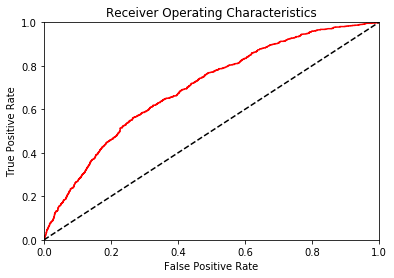

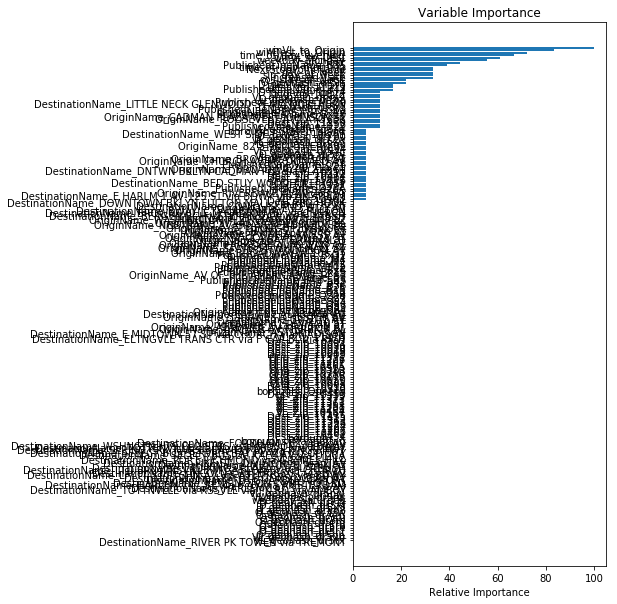

In [181]:
rfc = ensemble.RandomForestClassifier(max_features='auto',max_depth=4, max_leaf_nodes=2,n_estimators=200,class_weight='balanced',random_state=20)
Metrics(rfc, X_trainS , y_trainB, X_testS, y_test)

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
rfc.feature_importances_

In [ ]:
param_grid = param_grid = {'solver':['lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':range(120,300,5),  'warm_start' :[True]}
gridsearch(lr, X_train , y_train, param_grid)



Logistic Regression


C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_mode


Consfusion Matrix
col_0        0    1
Late_Bus           
0         1679  835
1          326  603

Classification Report
              precision    recall  f1-score   support

     On-time       0.84      0.67      0.74      2514
        Late       0.42      0.65      0.51       929

    accuracy                           0.66      3443
   macro avg       0.63      0.66      0.63      3443
weighted avg       0.72      0.66      0.68      3443

Train Score 0.6801325158227848
Test Score 0.66279407493465
Recall Score 0.6490850376749193


C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_mode

AUC: 0.688


C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


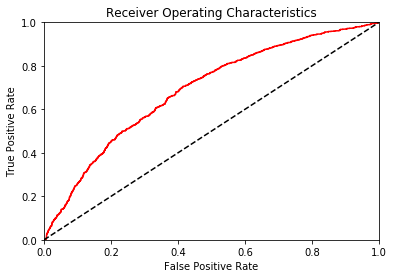

In [182]:
print('Logistic Regression')
lr = LogisticRegression(max_iter=100, solver= 'sag', warm_start= True)
Metrics(lr, X_trainS , y_trainB, X_testS, y_test)

In [183]:
d = { 'Features': X_train.columns,'Coefficients': lr.coef_[0]}
df = pd.DataFrame(data=d)
df.sort_values(by='Coefficients',ascending=False)
#a = df[df.Coefficients==0].Features.values

,Features,Coefficients
1,day_of_week,0.829089
5,cos_day_of_week,0.381743
160,Orig_zip_11226,0.243449
4,sin_day_of_week,0.235732
99,DestinationName_RIVER PK TOWER via TREMONT,0.223806
7,winVL_to_Origin,0.223026
97,DestinationName_PIKE ST - DIVISION ST via 2 AV,0.221754
2,increased_Late,0.163322
8,winDest_to_Origin,0.152465
60,OriginName_JAMAICA AV/170 ST,0.125492


In [ ]:
param_grid ={'loss':[‘deviance’, ‘exponential’], 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt'],
             'max_depth':range(2,12,1)}
clf = ensemble.GradientBoostingClassifier('warm_start':(True))
gridsearch(clf, X_train , y_train, param_grid)

In [ ]:
models = [] 
 
models.append(('Random_Forest' , ensemble.RandomForestClassifier(max_features='auto',max_depth=8,n_estimators=500,class_weight='balanced',random_state=20)))  

models.append(('Gradient_Boost' , ensemble.GradientBoostingClassifier(max_features='auto',max_depth=8,n_estimators=500,random_state=20)))
 
 
 
for name ,model in models:
    
    print(str(name))
    print()
    startTime = datetime.now()  
 
    Metrics(model, X_trainS , y_trainB, X_testS, y_test)
    startTime = datetime.now()  
    print(datetime.now() - startTime)

In [ ]:
feature_importance = model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### LASSO

# DONT TOUCH!!

In [ ]:



modeling_df = mta[[  'DirectionRef', 'PublishedLineName', 'OriginName',
        'DestinationName',   
        'NextStopPointName','Late_Bus', 'VehicleRef',
        'weekday', 'day_of_week', 'winsor_dist',
       'increased_Late', 'time_of_day', 'is_midweek', 'sin_min', 'cos_min',
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'boroughs', 'rush_hour', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash',
        ]]
#modeling_df = mta[['Late_Bus','PublishedLineName']]

dummies = ['PublishedLineName',  'time_of_day','OriginName',  'DestinationName','VL_geohash', 'O_geohash', 'D_geohash',
         'weekday', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip']
#dummies = ['PublishedLineName']
counts = ['NextStopPointName', 'VehicleRef' ]

modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)
 
X  = modeling_df
Y = modeling_df.Late_Bus


 

 
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)  
# count encoding 
X_train, X_test = cat_to_count(X_train,X_test,counts) 

X_train.drop('Late_Bus',1,inplace=True)
X_test.drop('Late_Bus',1,inplace=True)

# balance class
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=20)
X_trainB, y_trainB = ros.fit_sample(X_train, y_train)
 


# scale
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_trainB)
X_trainS = sclr.transform(X_trainB)
X_testS = sclr.transform(X_test)
 

Train_Score =  []
Test_Score =  []
Recall_Score =  []
ii = []



In [ ]:
modeling_df = mta[[  'DirectionRef',  
        'Late_Bus', 
        'weekday', 'day_of_week', 'winsor_dist',
       'increased_Late', 'time_of_day', 'is_midweek', 
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'boroughs', 'rush_hour',  'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash',
        ]]
#modeling_df = mta[['Late_Bus','PublishedLineName']]

#dummies = ['PublishedLineName',  'time_of_day','OriginName',  'DestinationName','VL_geohash', 'O_geohash', 'D_geohash',
 #        'weekday', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip']
#dummies = ['PublishedLineName']
dummies = [   'time_of_day',    'VL_geohash', 'O_geohash', 'D_geohash',
         'weekday', 'boroughs', ]
counts = []
modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)
 
X  = modeling_df
Y = modeling_df.Late_Bus


 

 
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)  
# count encoding 
X_train, X_test = cat_to_count(X_train,X_test,counts) 

X_train.drop('Late_Bus',1,inplace=True)
X_test.drop('Late_Bus',1,inplace=True)
X_train.drop(a,1,inplace=True)
X_test.drop(a,1,inplace=True)



# balance class
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=20)
X_trainB, y_trainB = ros.fit_sample(X_train, y_train)
 


# scale
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_trainB)
X_trainS = sclr.transform(X_trainB)
X_testS = sclr.transform(X_test)
 

Train_Score =  []
Test_Score =  []
Recall_Score =  []
ii = []


Train Score 0.667276503164557
Test Score 0.6619227417949463
Recall Score 0.6426264800861141
5


Consfusion Matrix
col_0        0    1
Late_Bus           
0         1682  832
1          332  597

Classification Report
              precision    recall  f1-score   support

     On-time       0.84      0.67      0.74      2514
        Late       0.42      0.64      0.51       929

    accuracy                           0.66      3443
   macro avg       0.63      0.66      0.62      3443
weighted avg       0.72      0.66      0.68      3443

Train Score 0.667276503164557
Test Score 0.6619227417949463
Recall Score 0.6426264800861141
AUC: 0.700


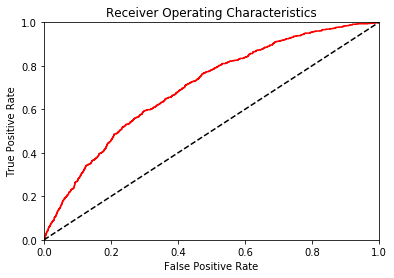

In [156]:
 
            
lr = LogisticRegression(penalty='l1',solver='liblinear',max_iter=50,C=.0038, warm_start=True)
lr.fit(X_trainS, y_trainB)
y_pred = lr.predict(X_testS) 
print("Train Score",lr.score(X_trainS, y_trainB))
print("Test Score",lr.score(X_testS, y_test))
print("Recall Score",recall_score(y_test,y_pred))
print(i)
#Train_Score.append(lr.score(X_trainS, y_trainB))
#Test_Score.append(lr.score(X_testS, y_test))
#Recall_Score.append(recall_score(y_test,y_pred))
#ii.append(i)
print()
Metrics(lr, X_trainS , y_trainB, X_testS, y_test)

In [ ]:
plt.plot(ii,Train_Score) 
plt.plot(ii,Test_Score)
plt.plot(ii,Recall_Score)

In [ ]:
print('LASSO Logistic Regression')
%timeit lr = LogisticRegression(penalty='l1',solver='liblinear',max_iter=20,C=.004, warm_start=True)
Metrics(lr, X_trainS , y_trainB, X_testS, y_test)

In [160]:
d = { 'Features': X_train.columns,'Coefficients': lr.coef_[0]}
df = pd.DataFrame(data=d)
df.sort_values(by='Coefficients',ascending=False)
a = df[df.Coefficients==0] 
a

,Features,Coefficients
23,OriginName_ALABAMA AV / FULTON ST,0.0
27,OriginName_E 57 ST/3 AV,0.0
39,DestinationName_LEFFRTS GDNS OCEAN AV,0.0
48,DestinationName_WEST SIDE BWAY - 106 ST,0.0
69,weekday_Saturday,0.0
70,weekday_Sunday,0.0
74,Orig_zip_10022,0.0
83,Dest_zip_10030,0.0
85,Dest_zip_10301,0.0


### PCA

In [ ]:
modeling_df = mta[['Late_Bus','DirectionRef', 'PublishedLineName', 'OriginName','DestinationName',           
                   'NextStopPointName','VehicleRef','weekday', 'day_of_week', 'winsor_dist',
                   'increased_Late', 'time_of_day', 'is_midweek', 'sin_min', 'cos_min',
                   'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week','boroughs', 
                   'rush_hour', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'winVL_to_Dest', 'winVL_to_Origin',
                   'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash',
                  ]]

dummies = ['PublishedLineName',  'time_of_day','OriginName',  'DestinationName','VL_geohash', 'O_geohash', 'D_geohash',
           'weekday', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip', ]

counts = ['NextStopPointName','VehicleRef']

modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)
 
X  = modeling_df.drop('Late_Bus',1)
Y = modeling_df.Late_Bus
 

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)  

In [ ]:
# convert to counts 
X_train, X_test = cat_to_count(X_train,X_test,counts) 

In [ ]:
X_train.shape

In [ ]:
#Random over_sample
ros = RandomOverSampler(random_state=20)
X_trainB, y_trainB = ros.fit_sample(X_train, y_train)


In [ ]:
# scale
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_trainB)
X_trainS = sclr.transform(X_trainB)
X_testS = sclr.transform(X_test)

from sklearn.preprocessing import normalize
X_trainS = normalize(X_trainS)
X_testS = normalize(X_testS)


In [ ]:
#pca
pca = PCA(n_components=,random_state=20)
pca.fit(X_trainS)  
X_train = pca.fit_transform(X_trainS)
X_test = pca.transform(X_testS)

In [ ]:
 
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

In [ ]:
a = pca.singular_values_
 

In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [ ]:
models = []

 
models.append(('Random_Forest' , ensemble.RandomForestClassifier(max_features= 'auto',criterion='gini', max_depth=10,n_estimators=500,
                                                                  class_weight='balanced',random_state=20)))
startTime = datetime.now()
models.append(('Logistic_Regression' , LogisticRegression(solver='lbfgs',max_iter=300)))
 
models.append(('Gradient_Boost' , ensemble.GradientBoostingClassifier(n_estimators=300,random_state=20)))
 
AUCscore = {}
Recallscore = {}
 
for name ,model in models:    
    print(str(name))
    print()
    Metrics(model, X_train , y_trainB, X_test, y_test)
    

In [ ]:
# initiate GridsearchCV for best parameters
from sklearn.model_selection import GridSearchCV
def gridsearch(model, X_train , y_train, param_grid):    
    grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', return_train_score=True,verbose=.5)
    grid.fit(X_train , y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    
    
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
 gridsearch(model, X_train , y_train, param_grid)

In [ ]:
#complexity vs error

train = []
test = []
ii = []


for n in np.arange(1,20,1):

    import sklearn.feature_selection 
    select =sklearn.feature_selection.SelectKBest(k=n)
    selected_features = select.fit(X_train, y_train)
    indicies_selected = selected_features.get_support(indices=True)
    colnames_selected = [X_train.columns[i] for i in indicies_selected]
    X_selected = X_train[colnames_selected]
    print(colnames_selected)
    #X = X[colnames_selected]
    #X = X[colnames_selected]

    X_trainc = X_train[colnames_selected]
    X_testc = X_test[colnames_selected]
    
    import imblearn
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=20)
    X_trainc, y_trainc = ros.fit_sample(X_trainc, y_train)

    
    
    from sklearn.preprocessing import StandardScaler
    sclr = StandardScaler()
    sclr.fit(X_trainc)
    X_trainc = sclr.transform(X_trainc)
    X_testc = sclr.transform(X_testc)
 

    
    model = LogisticRegression(penalty='l1',solver='liblinear',max_iter=500,C=1)
    model.fit(X_trainc , y_trainc)
    print(str(name))
    print()
    y_pred = model.predict(X_testc) 
    y_prob = cross_val_predict(model, X_testc, y_test, method='predict_proba',cv=5)    
    print(roc_auc_score(y_test,y_prob[:,1])) 
    print("Train Score",model.score(X_trainc, y_trainc))
    print("Test Score",model.score(X_testc, y_test))
    train.append(model.score(X_trainc, y_trainc))
    test.append(model.score(X_testc, y_test))
    ii.append(n)
plt.plot(train)
plt.plot(test)

In [ ]:
mta.Dest_to_Origin

In [ ]:
#opimized




modeling_df = mta[[  'DirectionRef', 'PublishedLineName', 'OriginName',
        'DestinationName',   
        'NextStopPointName','Late_Bus',
        
        'weekday', 'day_of_week', 'winsor_dist',
       'increased_Late', 'time_of_day', 'is_midweek', 'sin_min', 'cos_min',
       'sin_hour', 'cos_hour', 'sin_day_of_week', 'cos_day_of_week',
       'boroughs', 'rush_hour', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'winVL_to_Dest', 'winVL_to_Origin',
       'winDest_to_Origin', 'VL_geohash', 'O_geohash', 'D_geohash',
        ]]
modeling_df = mta[['Late_Bus','PublishedLineName']]

dummies = ['PublishedLineName',  'time_of_day','OriginName',  'DestinationName','VL_geohash', 'O_geohash', 'D_geohash',
         'weekday', 'boroughs', 'Orig_zip', 'Dest_zip', 'VL_Zip', 'NextStopPointName']
dummies = ['PublishedLineName']
counts = ['NextStopPointName','VehicleRef']

modeling_df = pd.concat([modeling_df.drop(dummies,1), pd.get_dummies(modeling_df[dummies],drop_first=True)], axis=1)
 
X  = modeling_df
Y = modeling_df.Late_Bus